# About Project: Insurance Claims- Fraud Detection

# Problem Statement:

Business case:
    
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


imported libraries

# EDA

In [2]:
#load datafile
ds=pd.read_csv("Insurance_Claims.csv")
ds

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
ds.shape

(1000, 40)

Dataset has total 1000 rows and 40 columns

In [4]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
ds.head() #top 5 rows of dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
ds.tail() #bottom 5 rows of dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


# Dataset Cleaning

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In this Dataset there is no null values, But Column '_c39' is useless column so we can drop this column

In [9]:
#dropping column 'Unnamed'
ds.drop('_c39', axis=1, inplace=True)
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

As we can find here that dataset object values so we have to convert object values into int

In [10]:
ds.apply(lambda x: len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Separating Categorical and Continuous data

In [11]:
ds.dtypes #check type of data

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
#ov= objective values
ov = (ds.dtypes == 'object')
cate_cols = list(ov[ov].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [13]:
#iv=integer values
iv = (ds.dtypes == 'int64')
int_cols = list(iv[iv].index)

print("Integer variables:")
print(int_cols)

Integer variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [14]:
int_cols.append('policy_annual_premium')

In [15]:
ds[int_cols].head(10)

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1406.91
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1197.22
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,1413.14
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1415.74
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1583.91
5,256,39,104594,1000,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003,1351.10
6,137,34,413978,1000,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012,1333.35
7,165,37,429027,1000,0,603195,0,0,23,3,2,2,51590,9380,9380,32830,2015,1137.03
8,27,33,485665,500,0,601734,0,0,21,1,1,1,27700,2770,2770,22160,2012,1442.99
9,212,42,636550,500,0,600983,0,-39300,14,1,2,1,42300,4700,4700,32900,1996,1315.68


In [16]:
ds[cate_cols].head(10)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,12-10-2006,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,02-01-2015,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,04-06-2000,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,13-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N
7,03-02-1990,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,27-02-2015,Multi-vehicle Collision,...,Total Loss,Police,VA,Columbus,3525 3rd Hwy,?,YES,Audi,A5,N
8,05-02-1997,IL,100/300,FEMALE,PhD,other-service,golf,own-child,30-01-2015,Single Vehicle Collision,...,Total Loss,Police,WV,Arlington,4872 Rock Ridge,NO,YES,Toyota,Camry,N
9,25-07-2011,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,05-01-2015,Single Vehicle Collision,...,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,NO,?,Saab,92x,N


Dropping Columns

In [17]:
# we can drop 'policy_bind_date', 'indicate_date' and 'indicate_location' columns as they are not giving so much information
ds.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)
cate_cols.remove('policy_bind_date')
cate_cols.remove('incident_date')
cate_cols.remove('incident_location')

We can see in cate_cols some columns have '?' as value, we are going to replace it with 'NAN'.

In [18]:
ds['property_damage'].replace('?', 'NAN', inplace = True)
ds['police_report_available'].replace('?', 'NAN', inplace = True)

# Data Visualization and Analysis

# Univariate Analysis

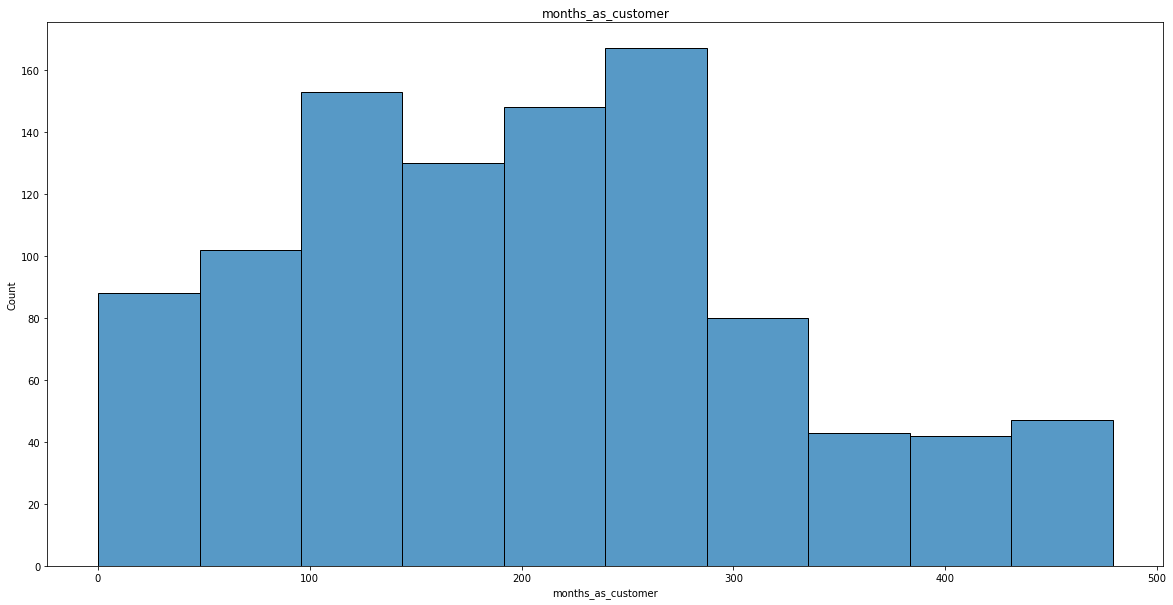

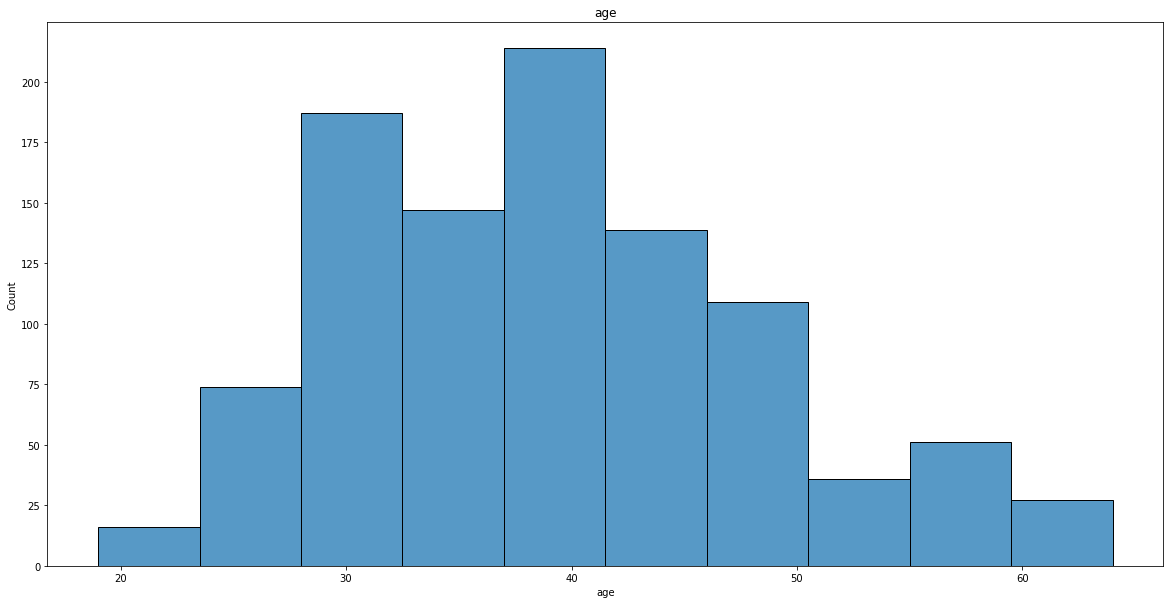

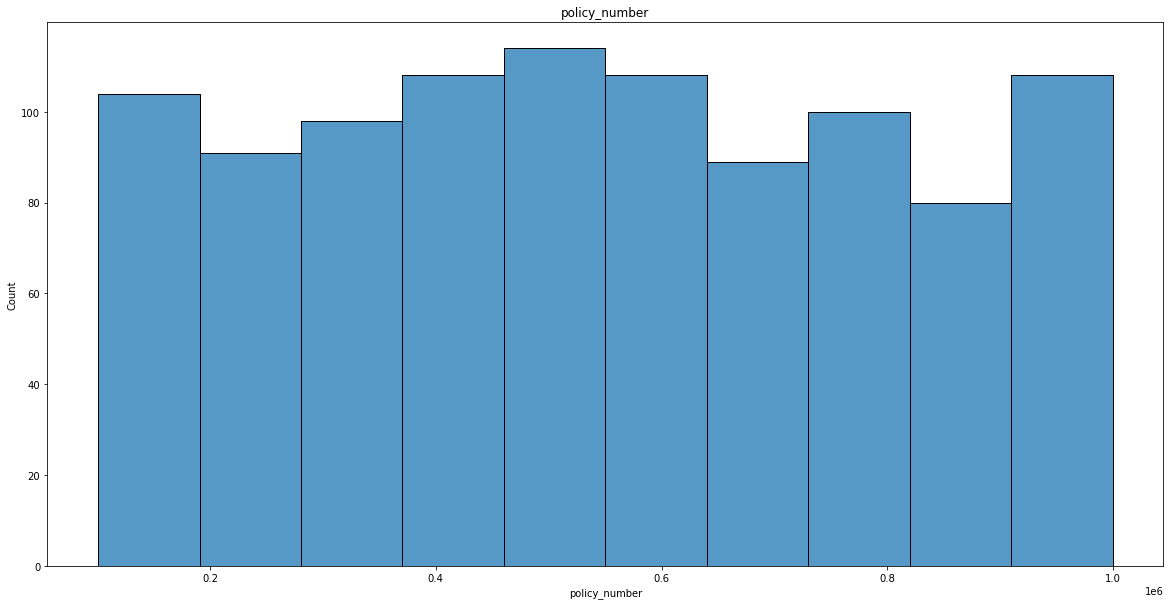

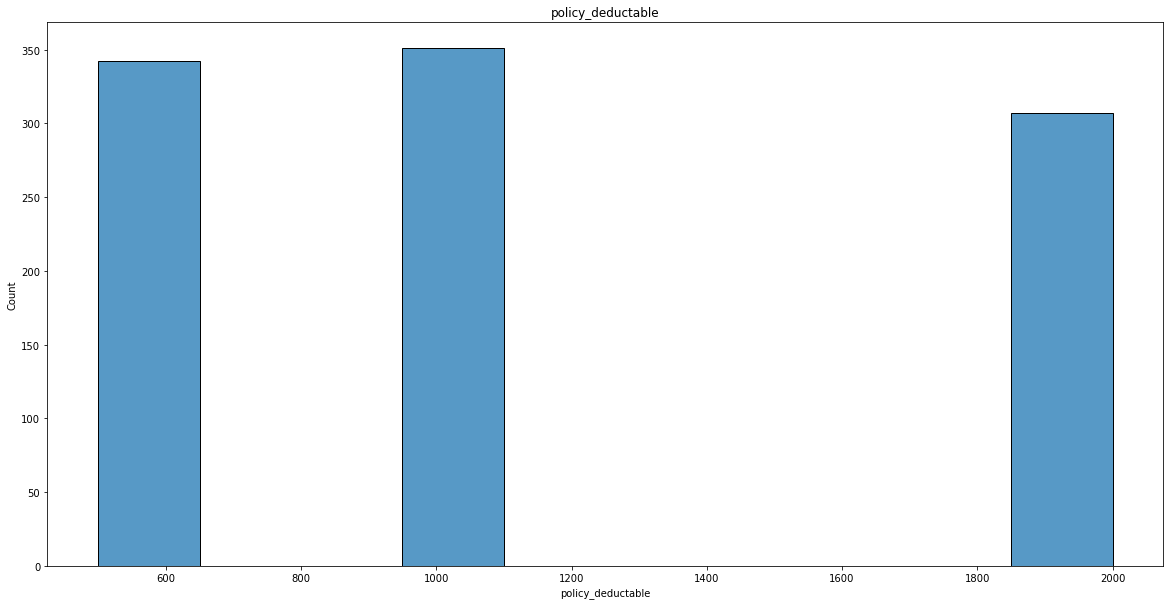

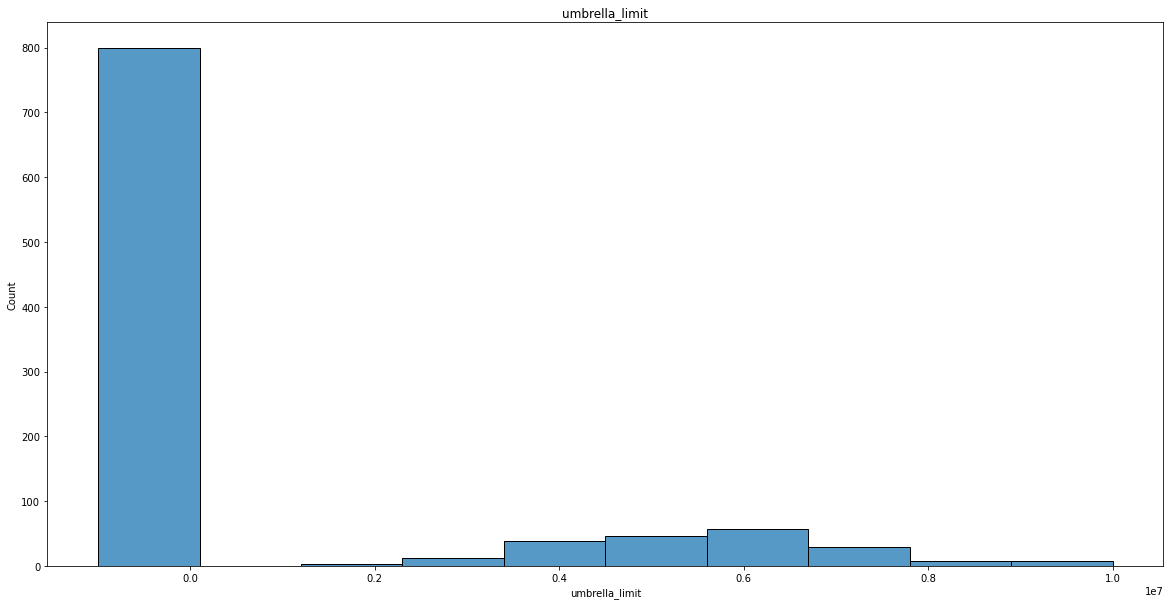

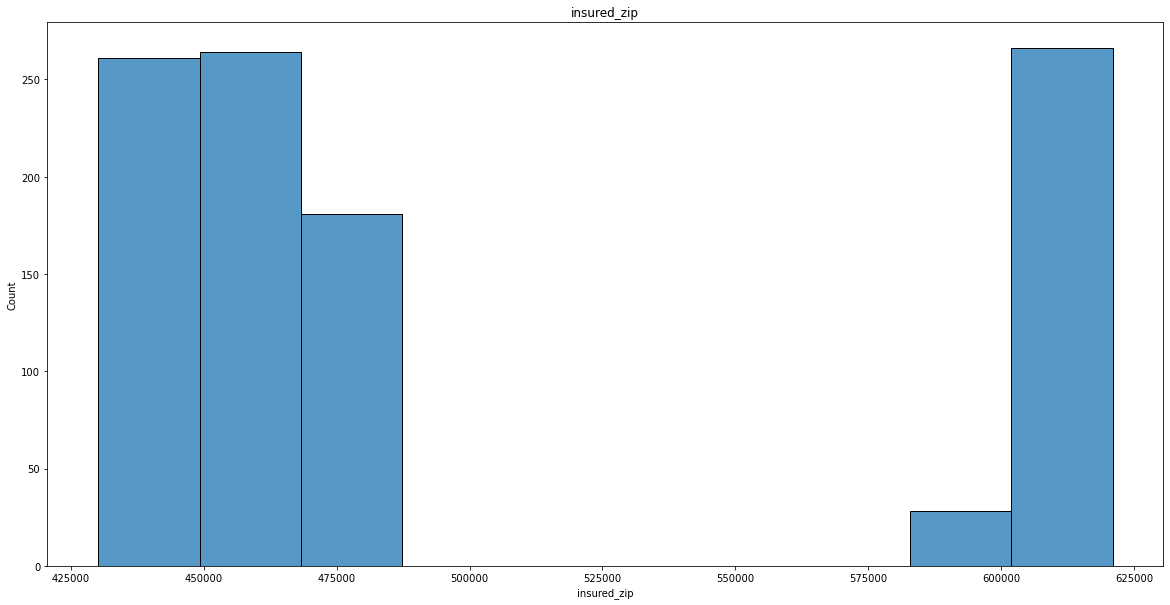

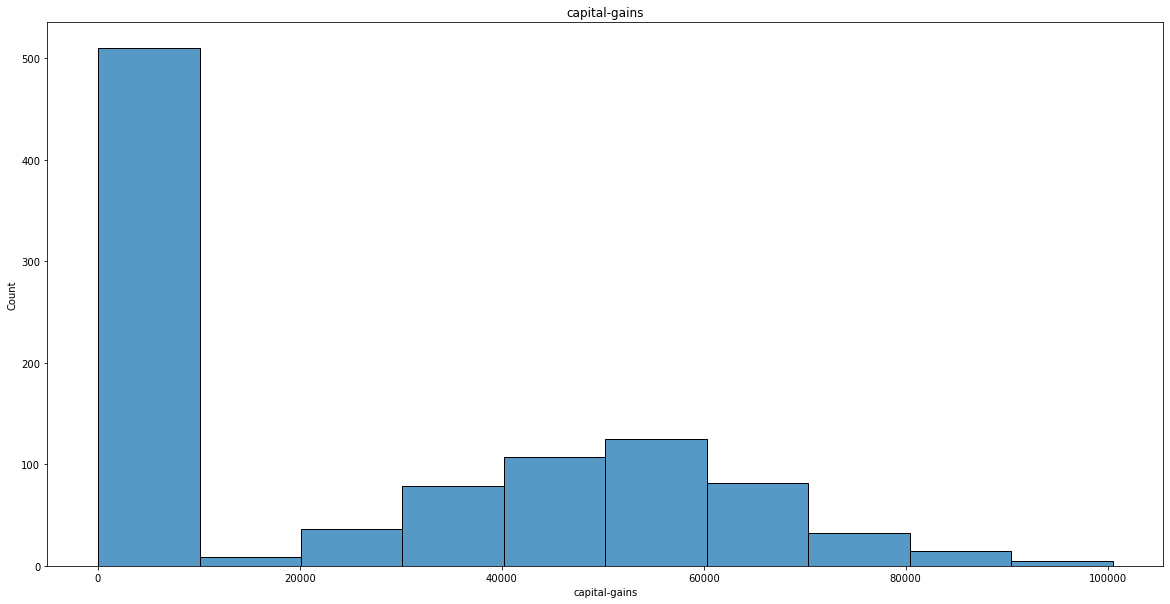

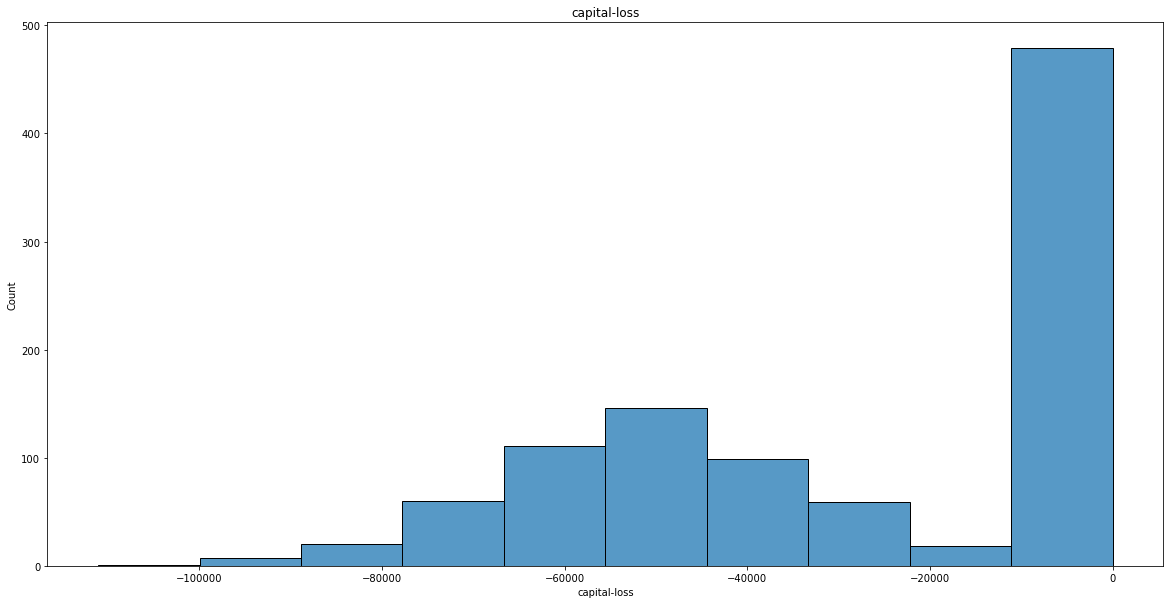

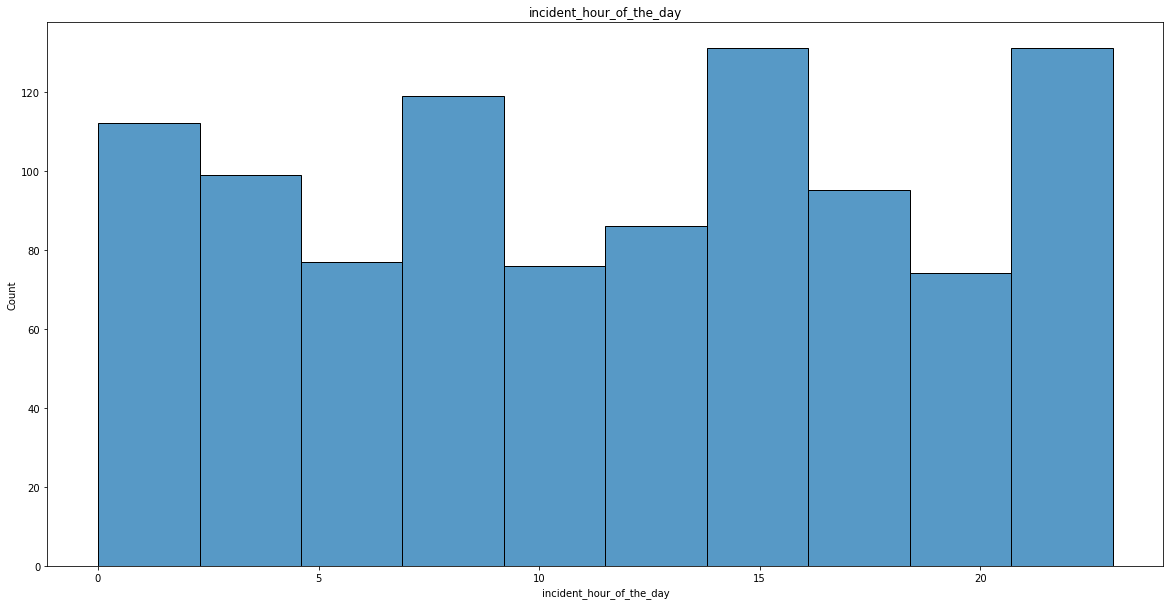

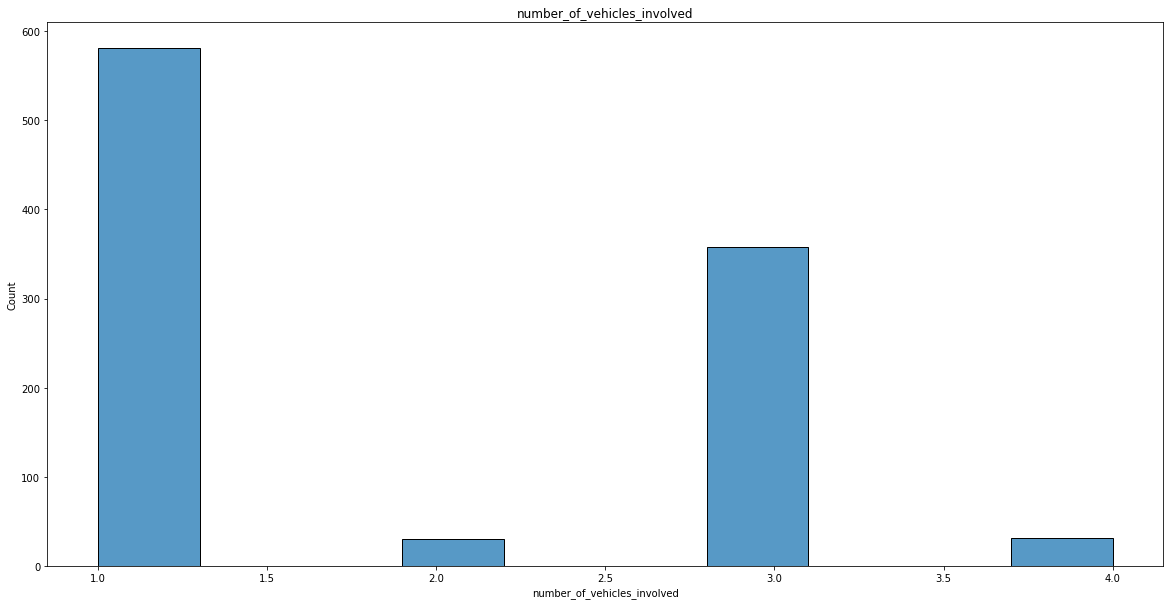

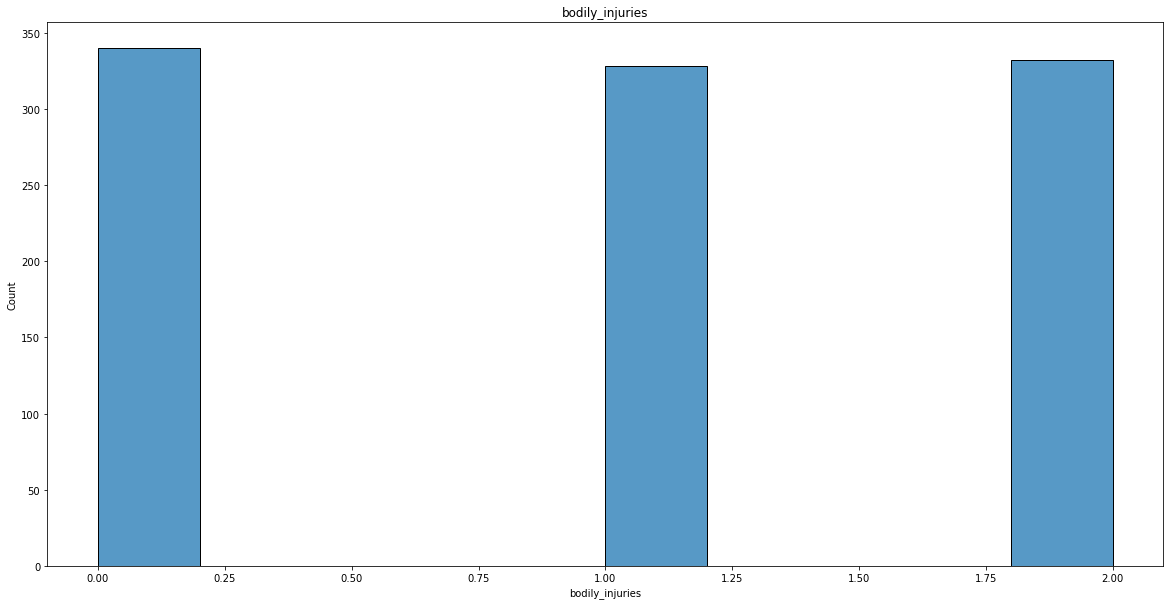

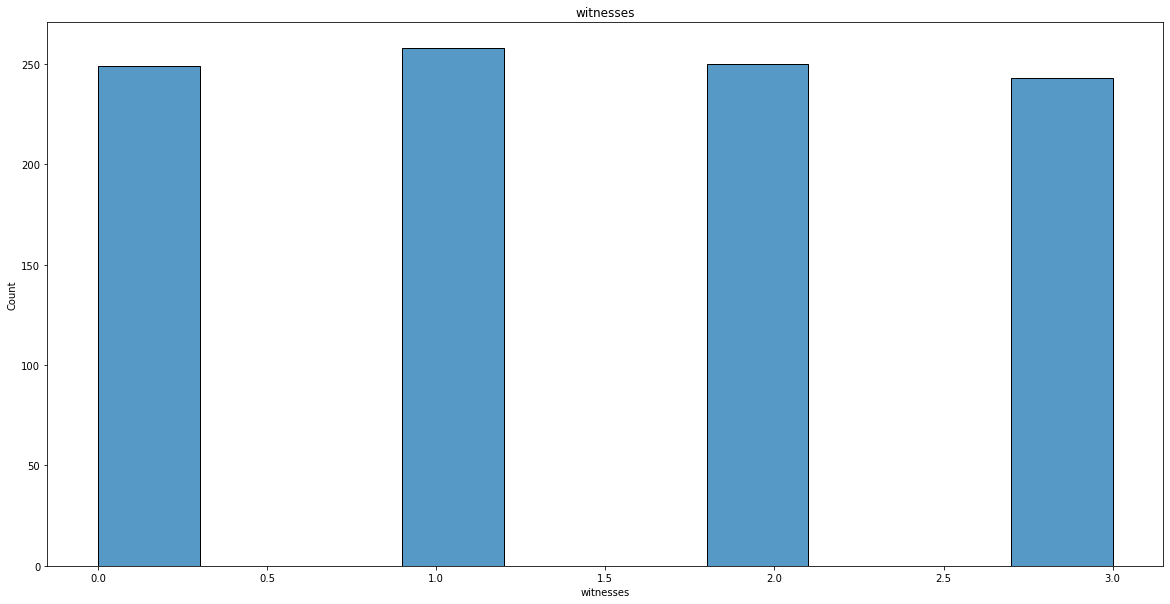

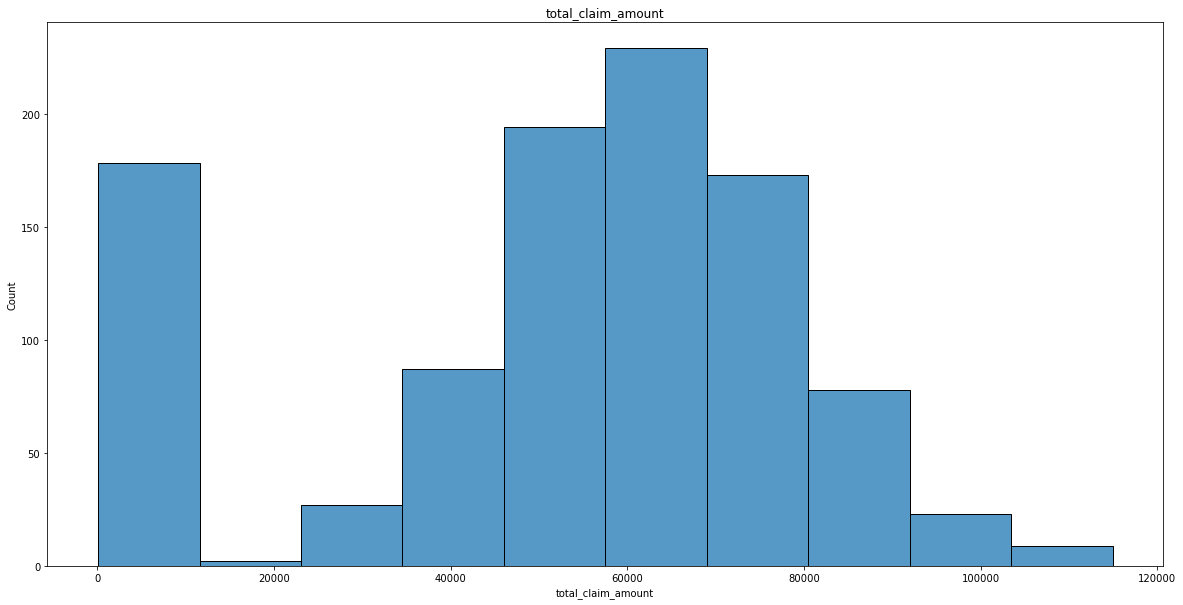

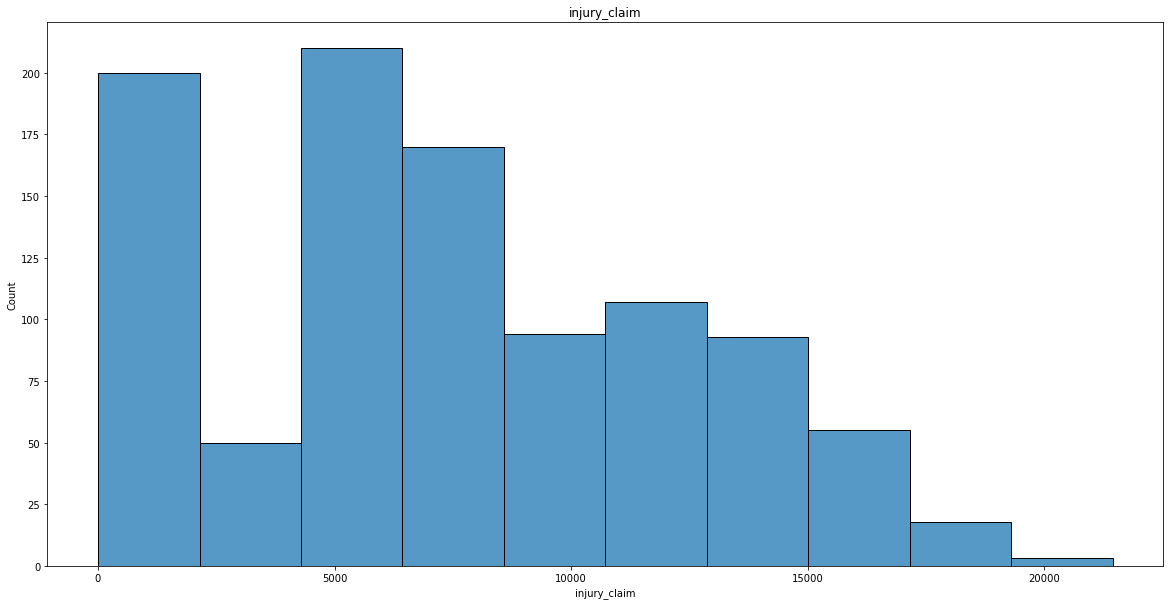

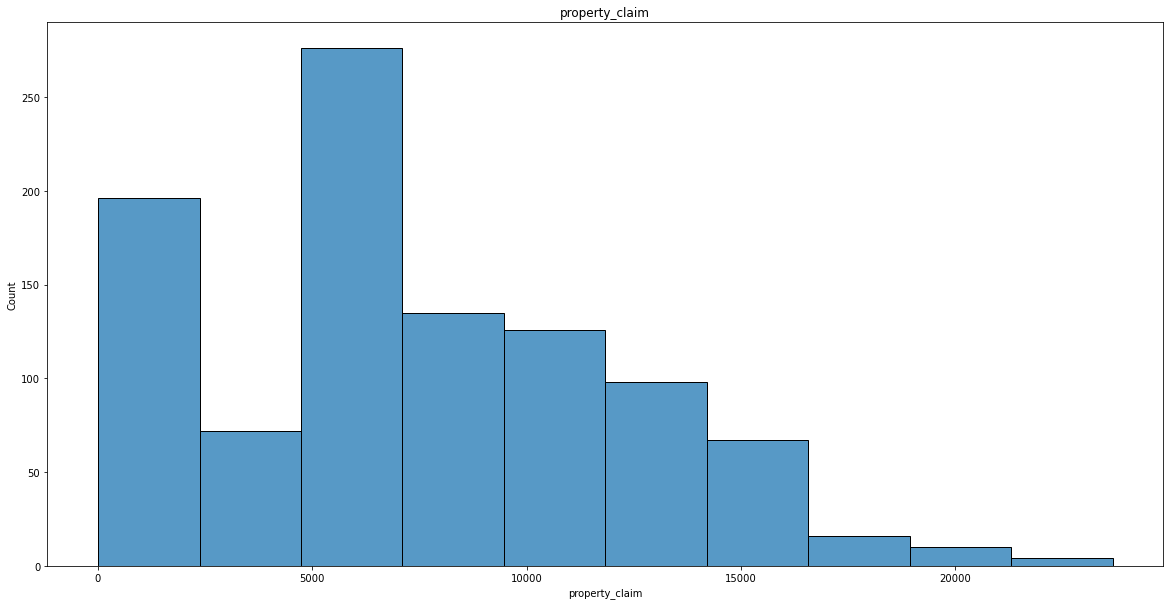

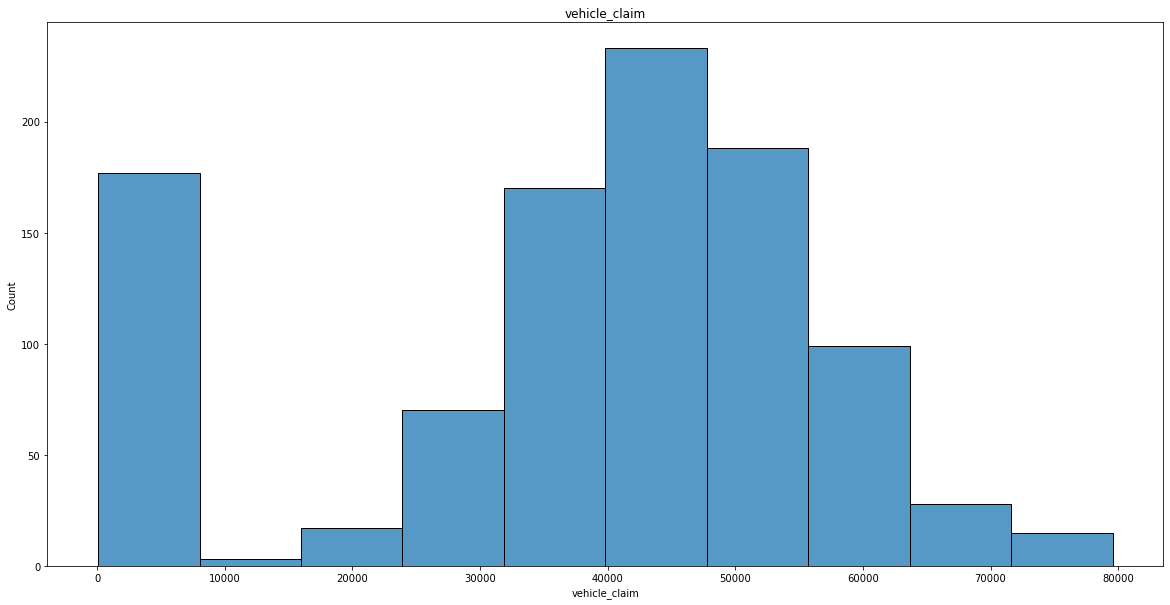

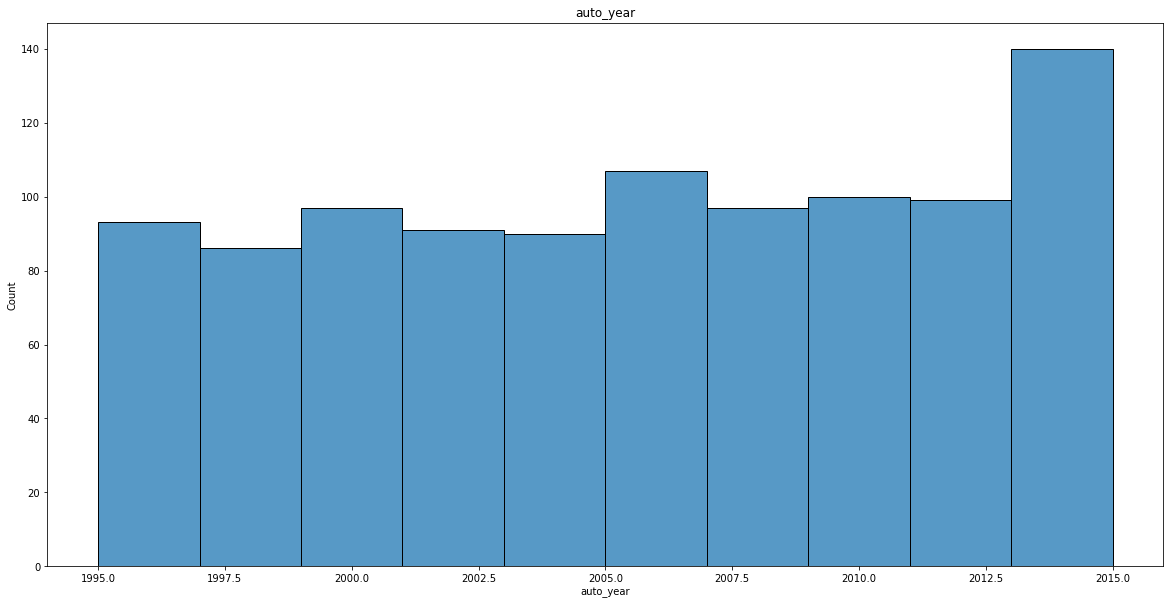

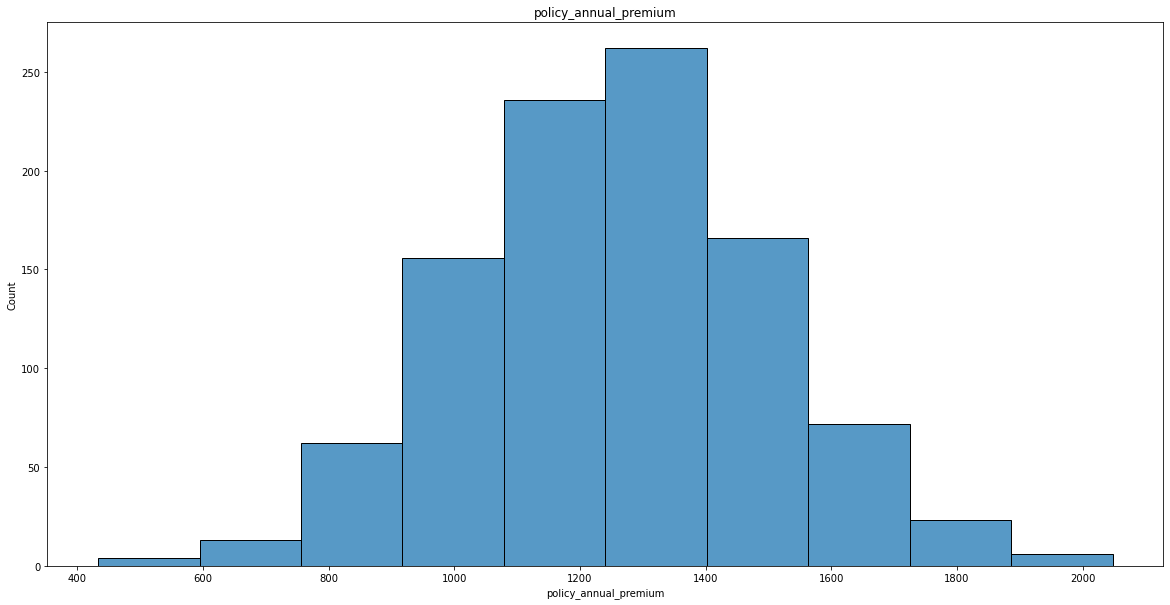

In [19]:
#int_cols
for i in ds[int_cols]:                                 #univariate analysis
    plt.figure(figsize = (20, 10))
    sns.histplot(ds[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

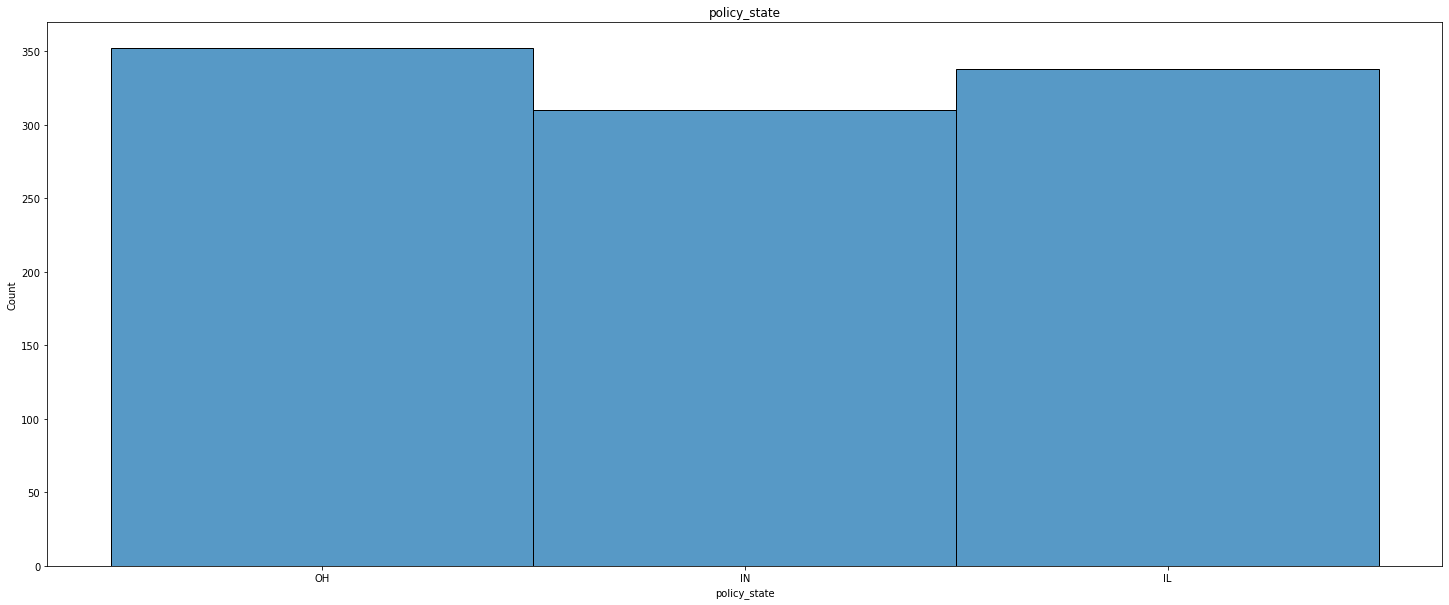

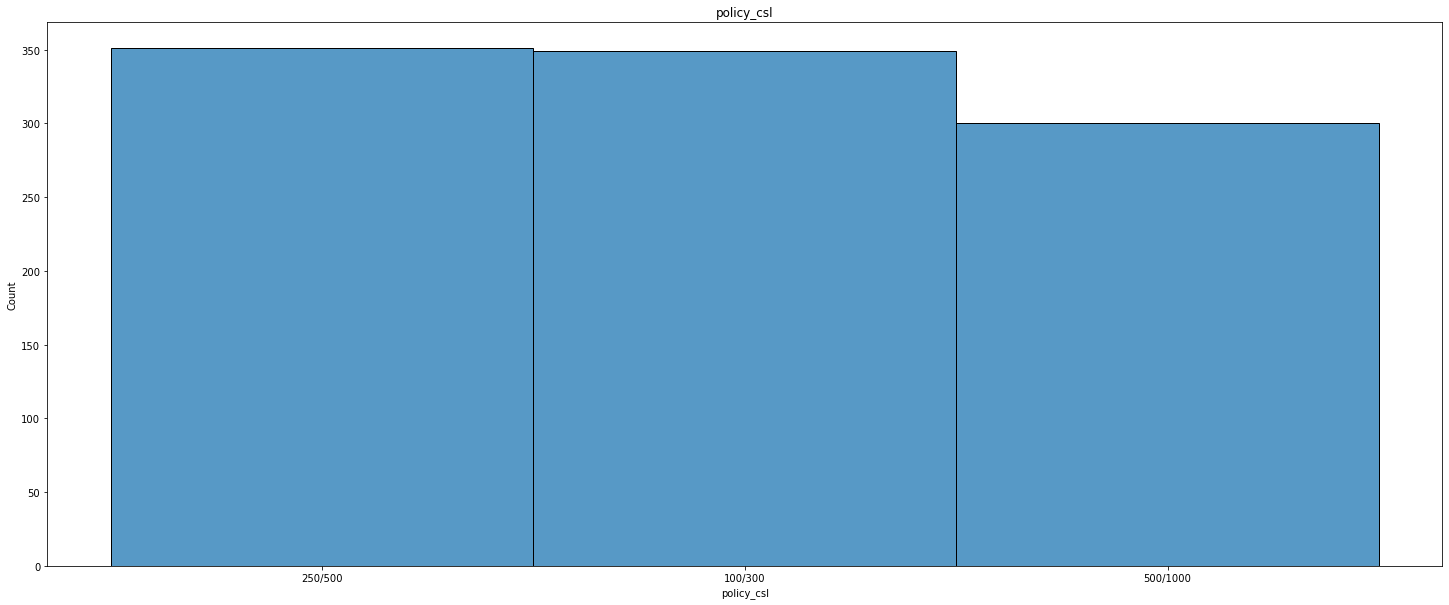

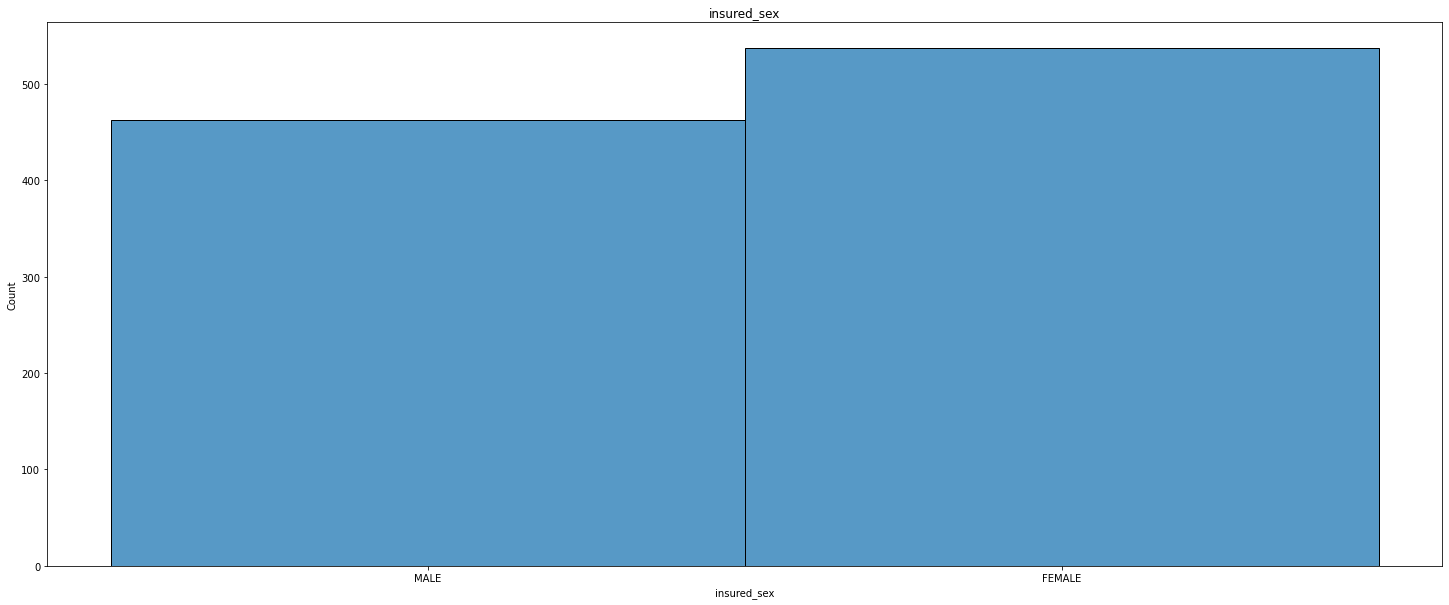

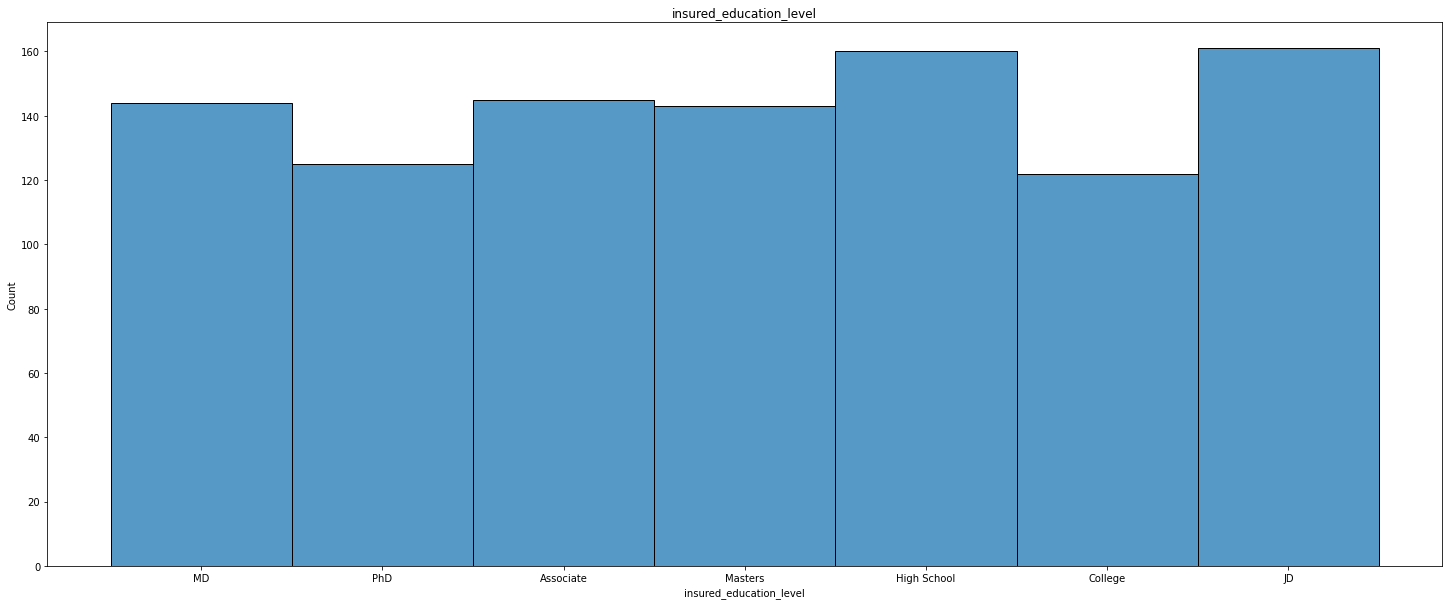

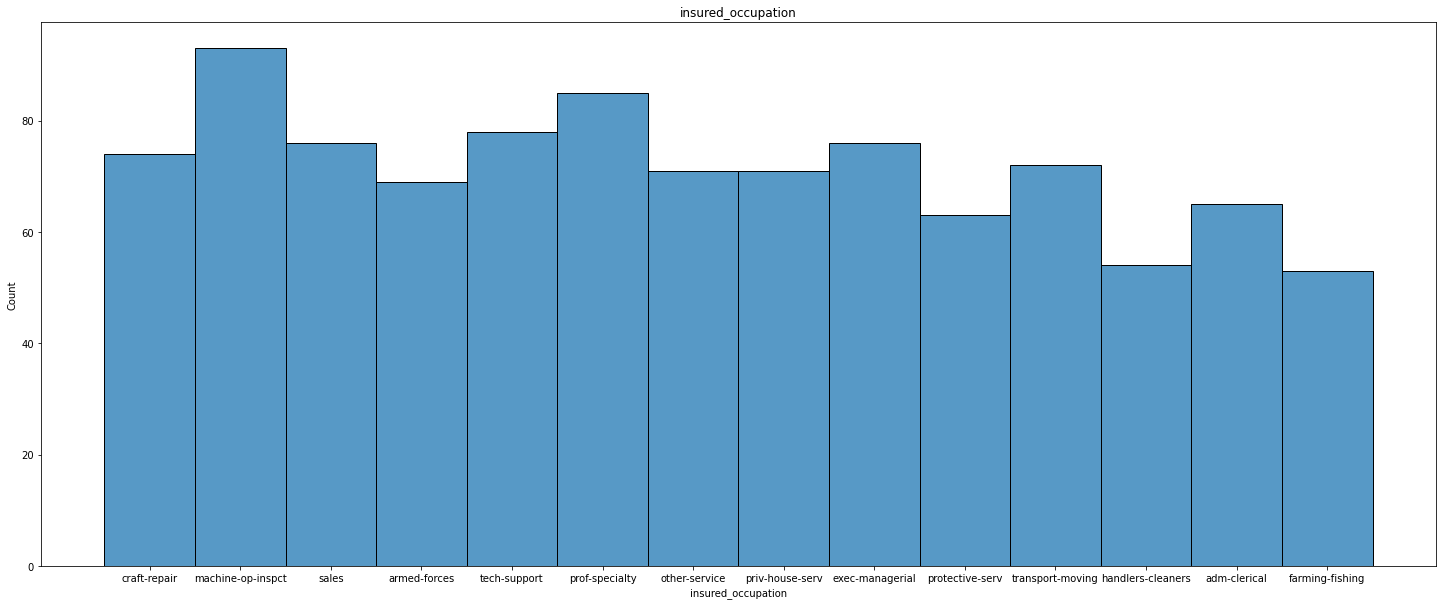

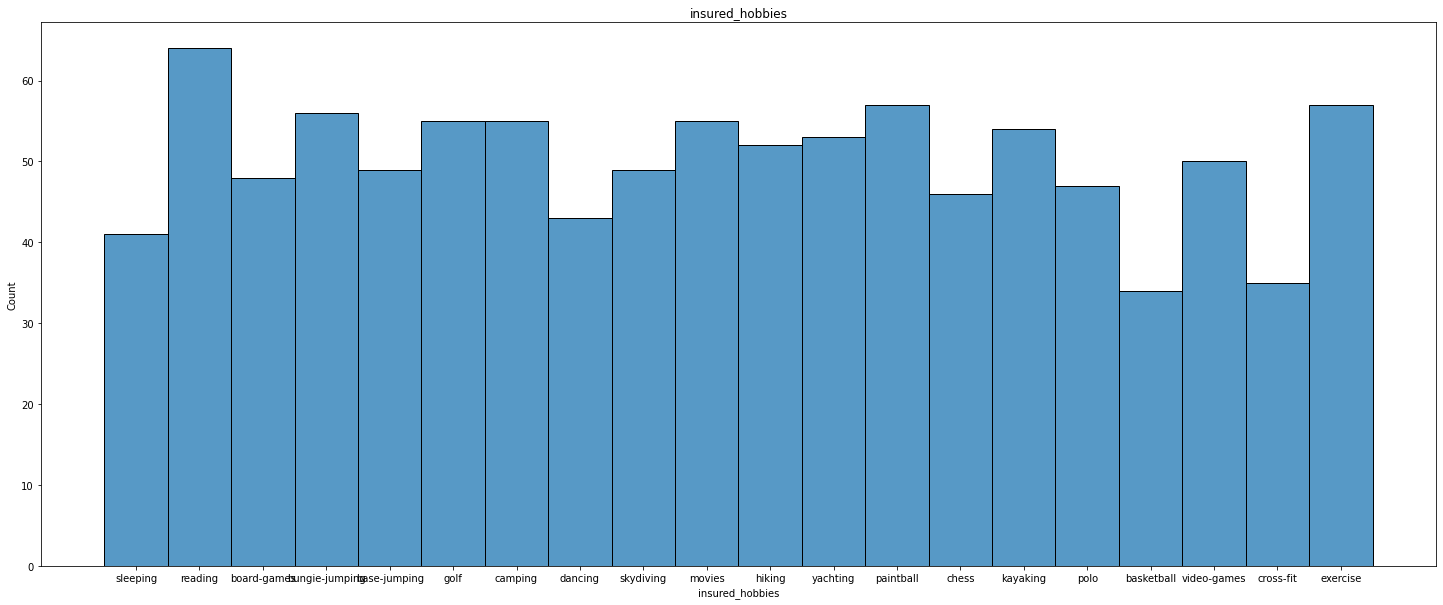

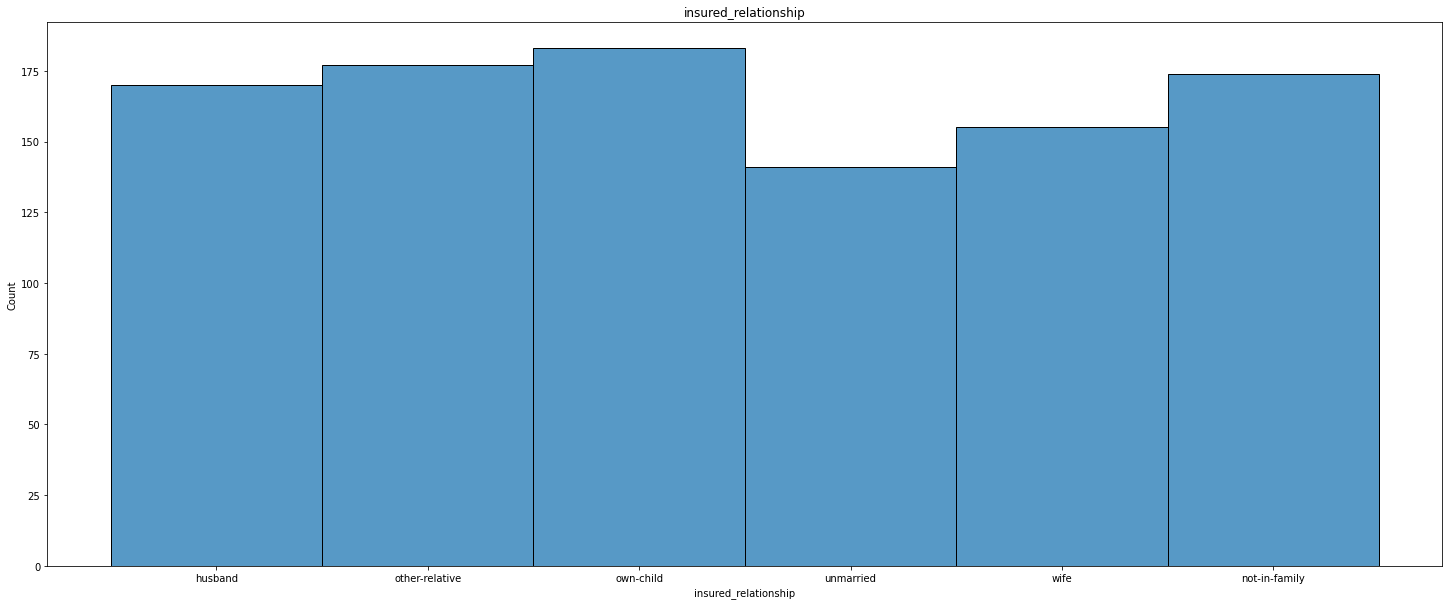

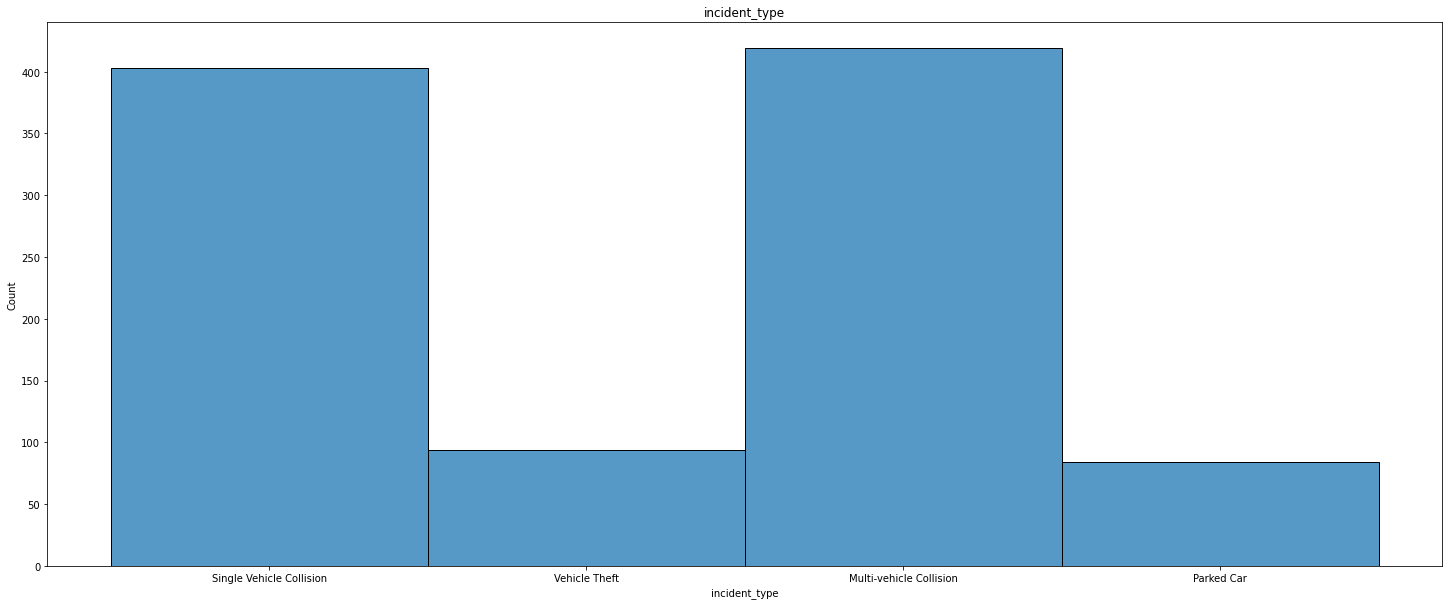

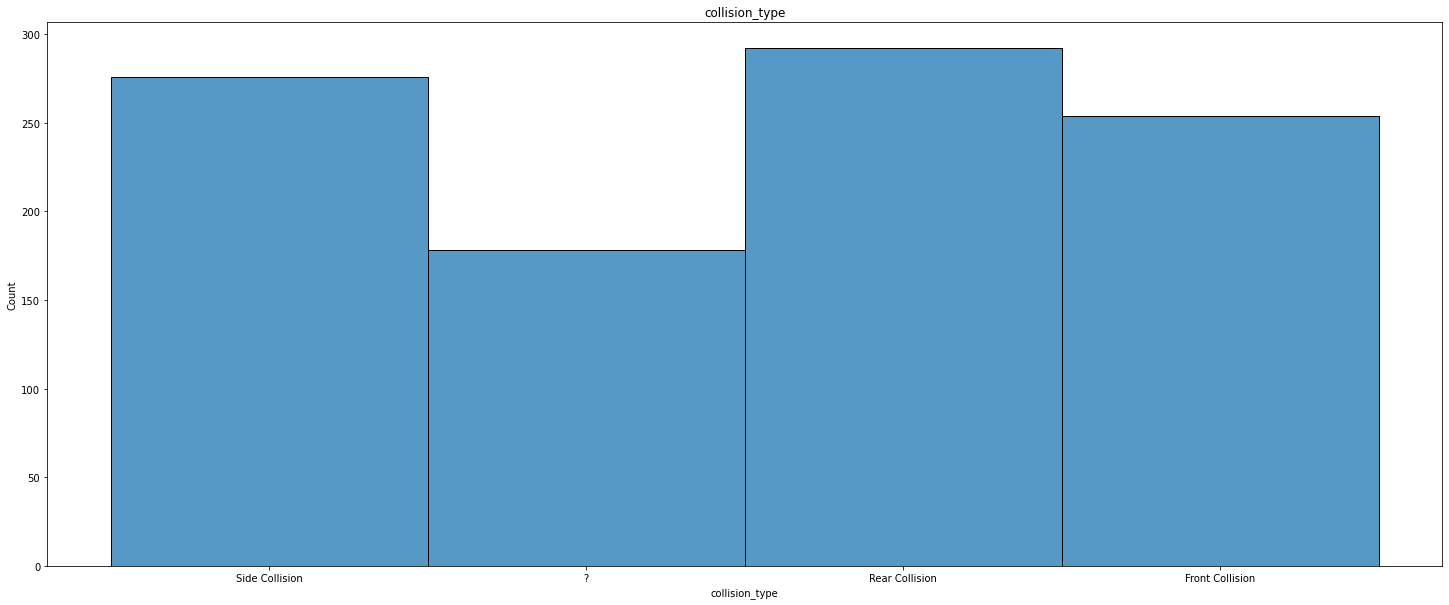

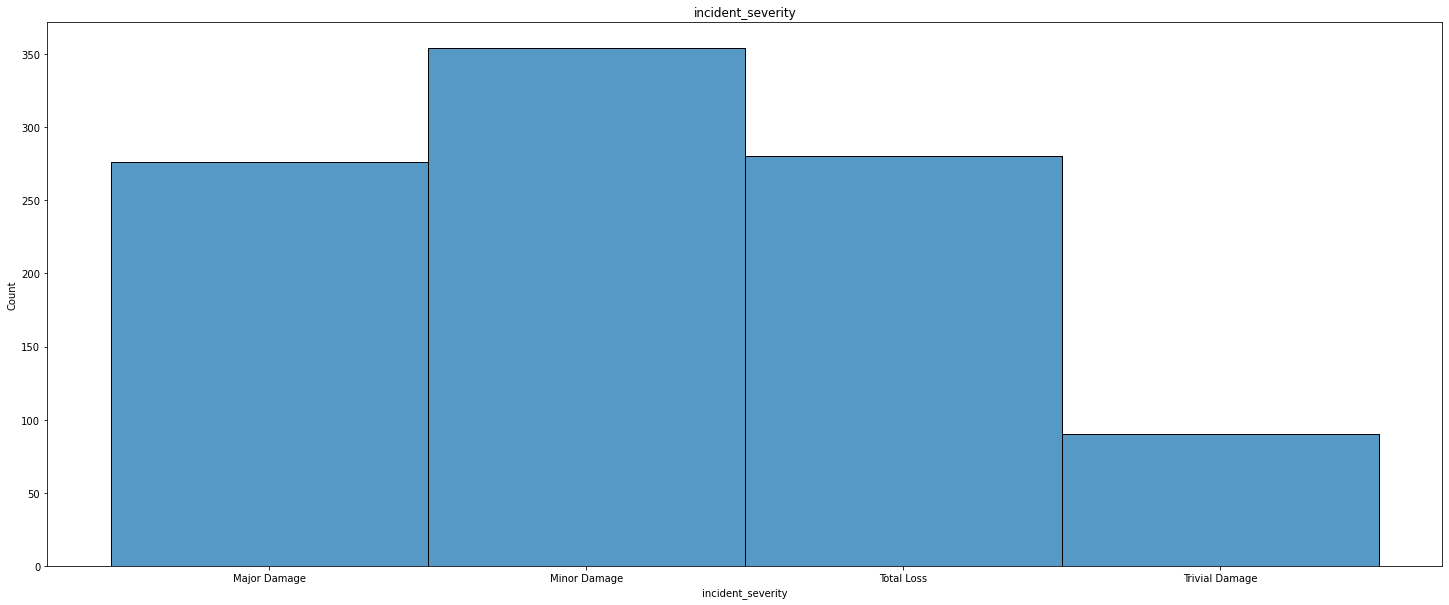

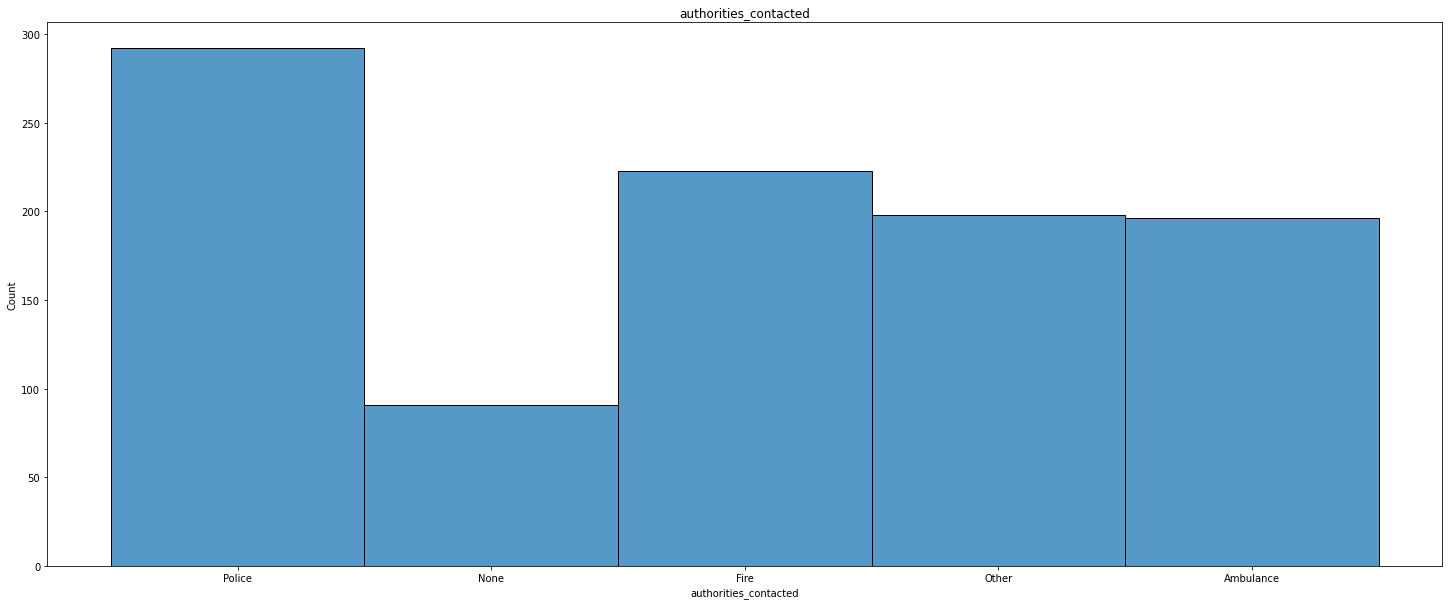

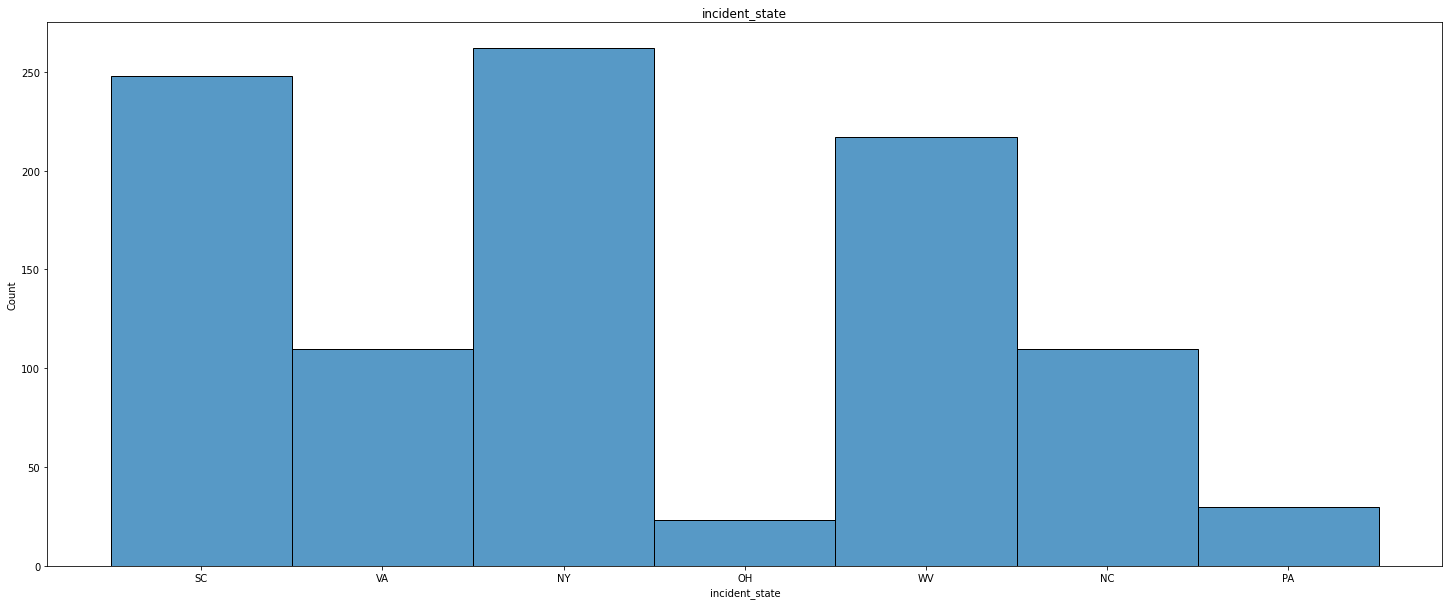

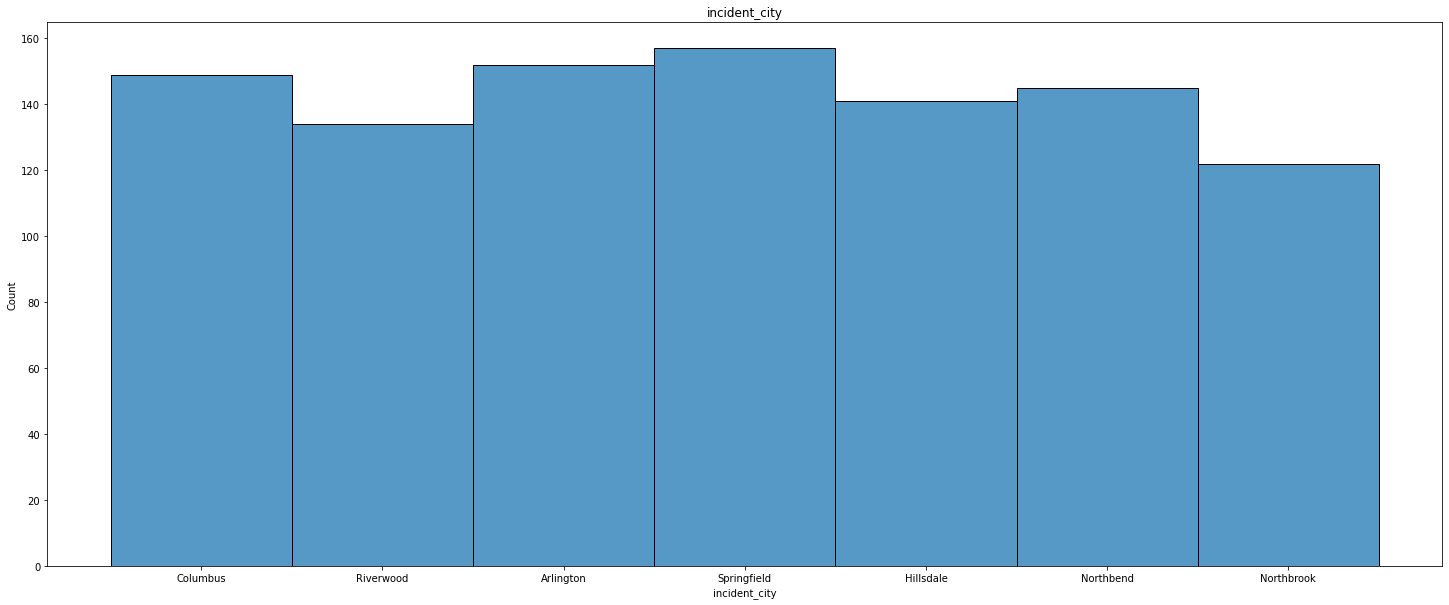

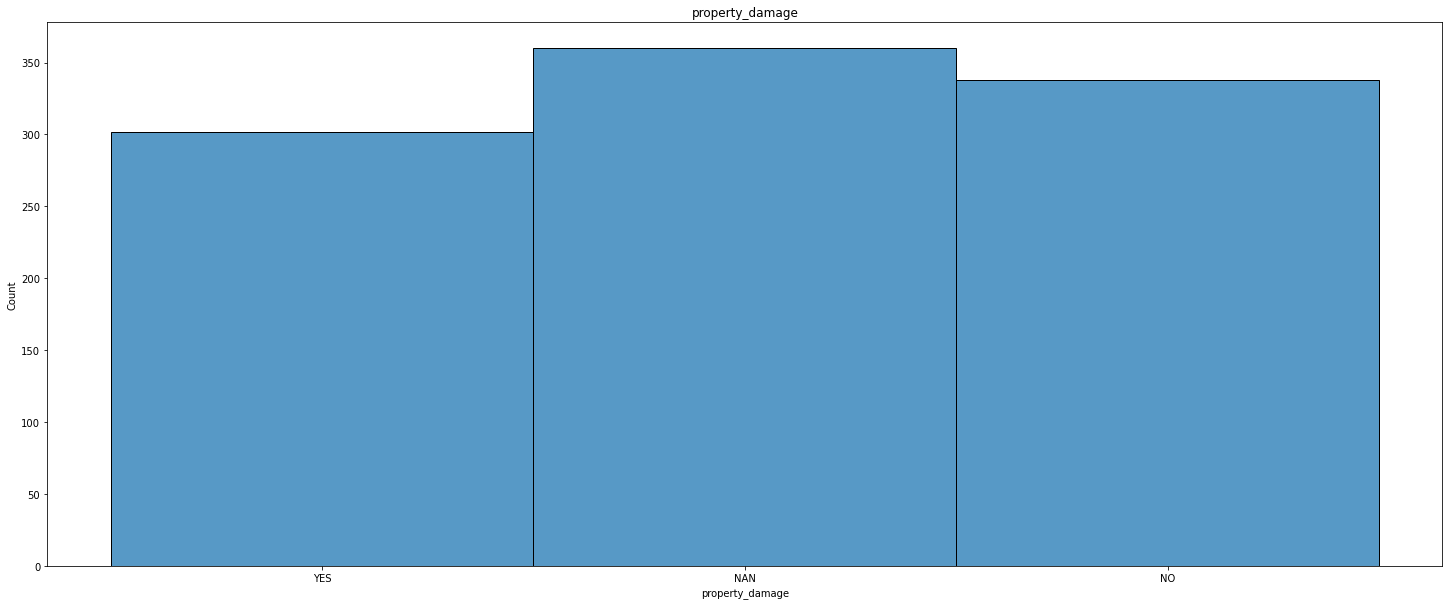

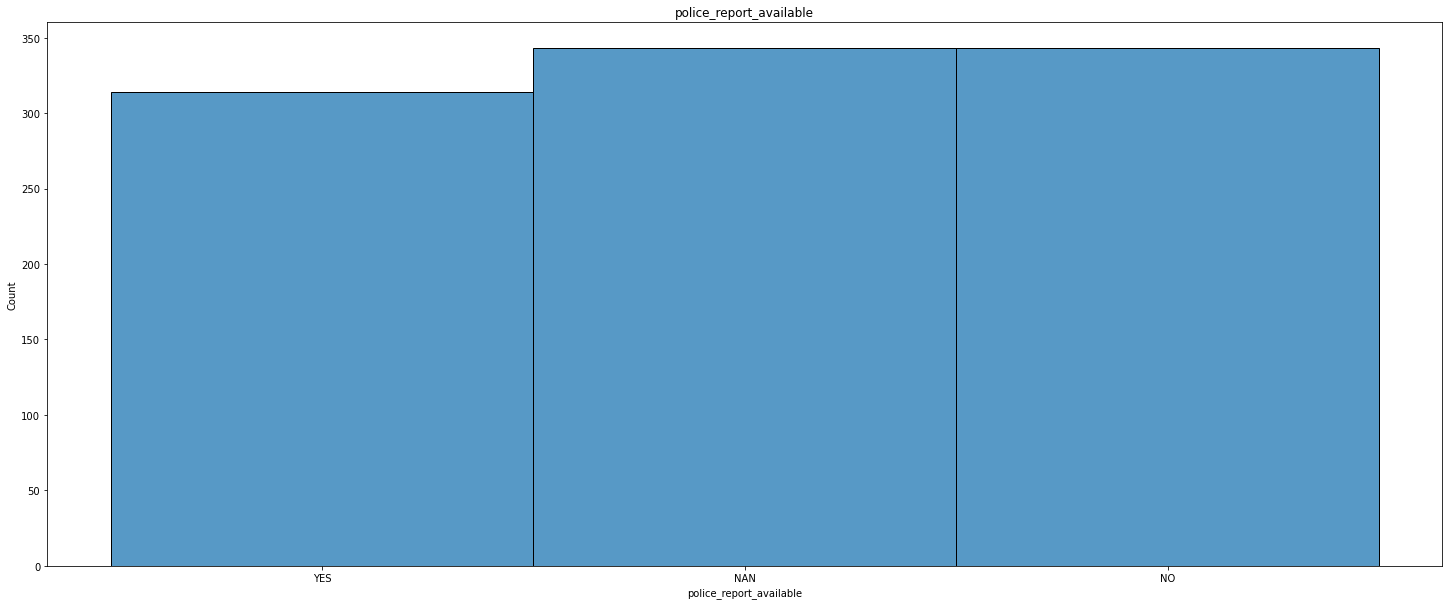

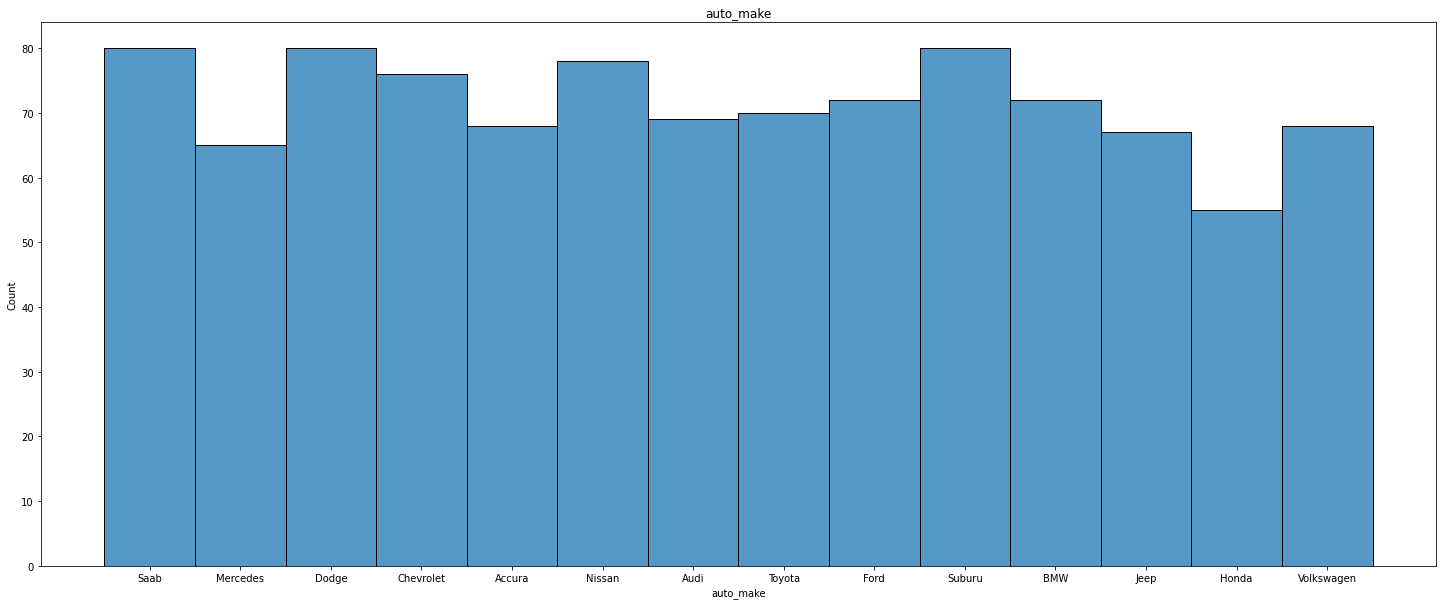

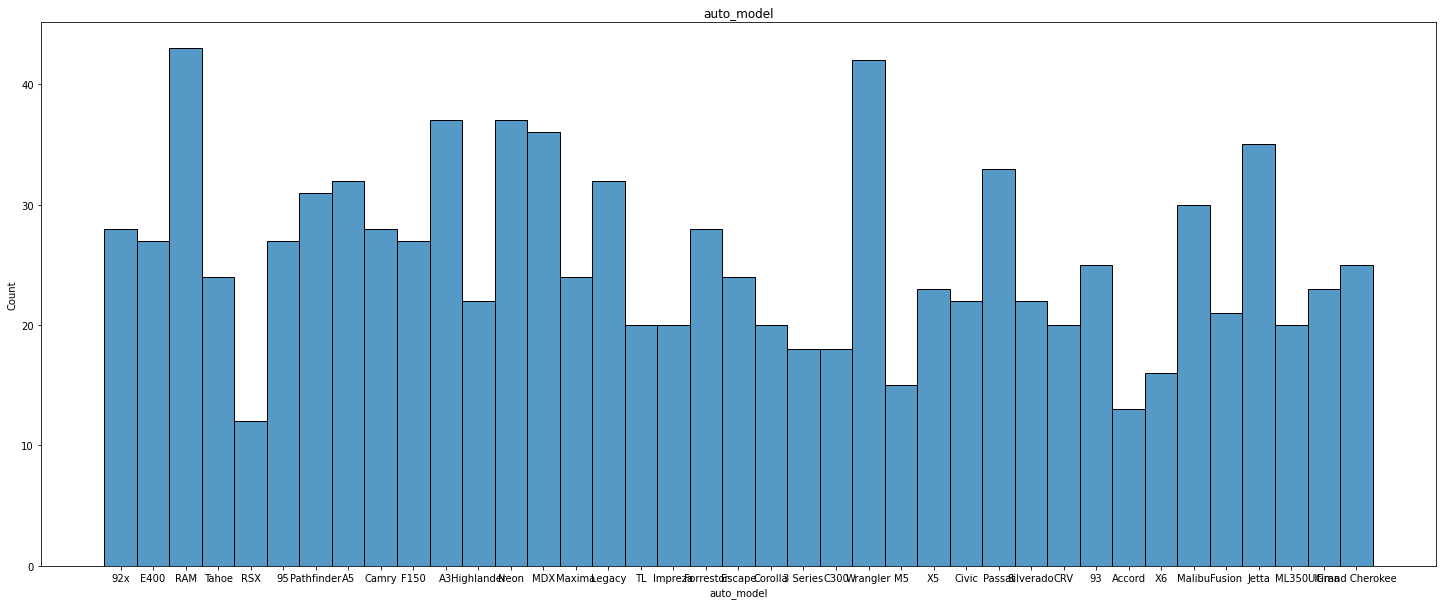

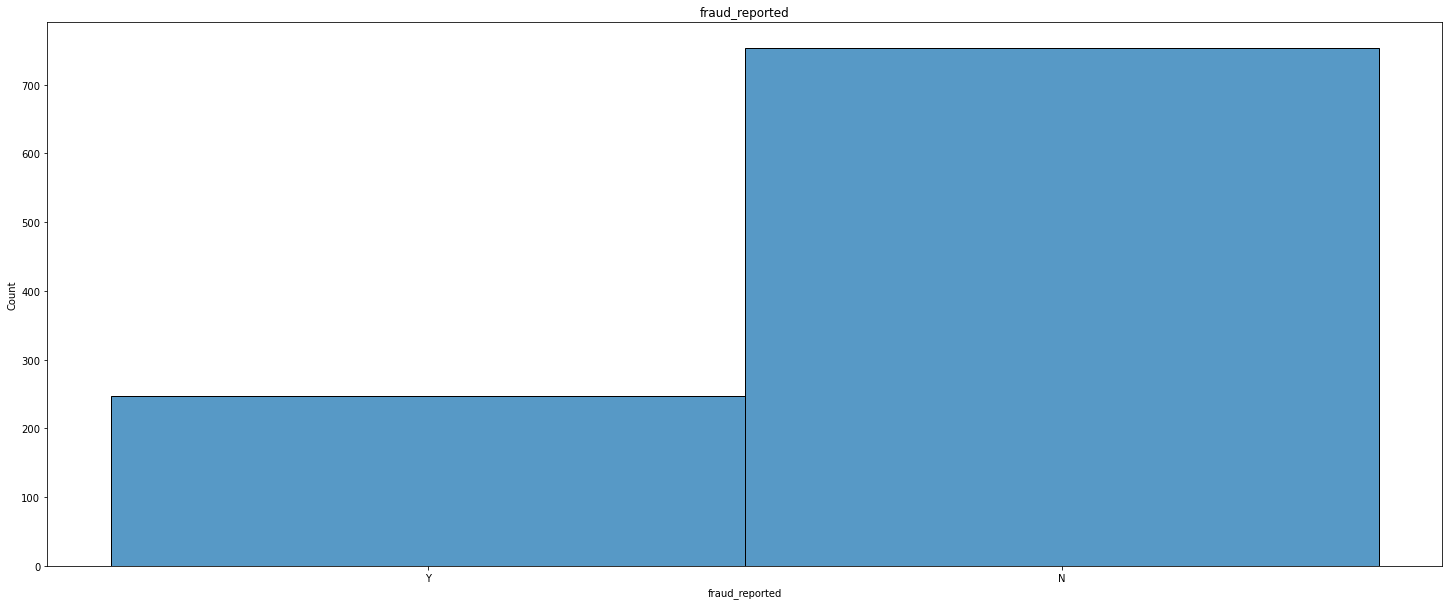

In [20]:
#cate_Cols
for i in ds[cate_cols]:                                 #univariate analysis
    plt.figure(figsize = (25, 10))
    sns.histplot(ds[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

# Bivariate Analysis

([<matplotlib.patches.Wedge at 0xa9e647d370>,
 [Text(-0.7851136132870644, 0.7704522141128092, 'N'),
  Text(0.785113649354535, -0.7704521773589873, 'Y')],
 [Text(-0.42824378906567145, 0.4202466622433504, '75.3%'),
  Text(0.4282438087388372, -0.42024664219581126, '24.7%')])

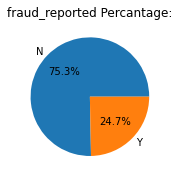

In [21]:
#lets create a pie chart to visualize the churn data
sizes = ds['fraud_reported'].value_counts(sort = True)
labels = np.unique(ds.fraud_reported)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("fraud_reported Percantage:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

Only 24.7% of the claims are fraud while 75.3% are not fraud.

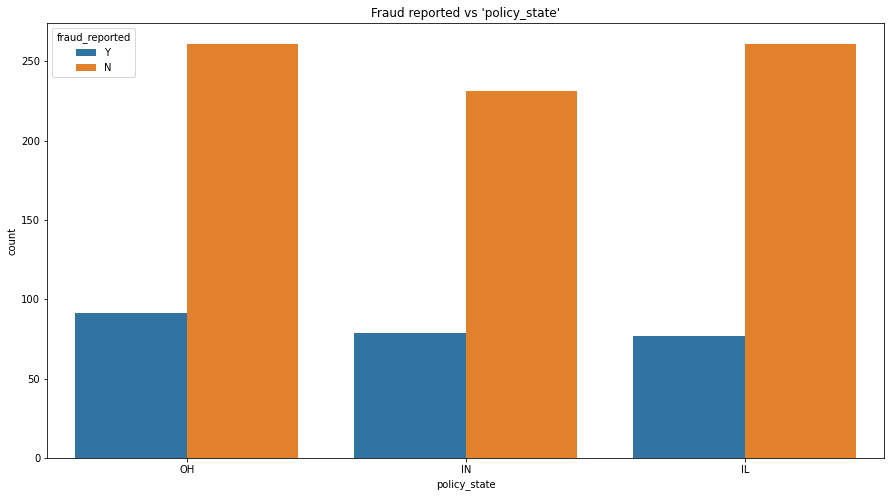

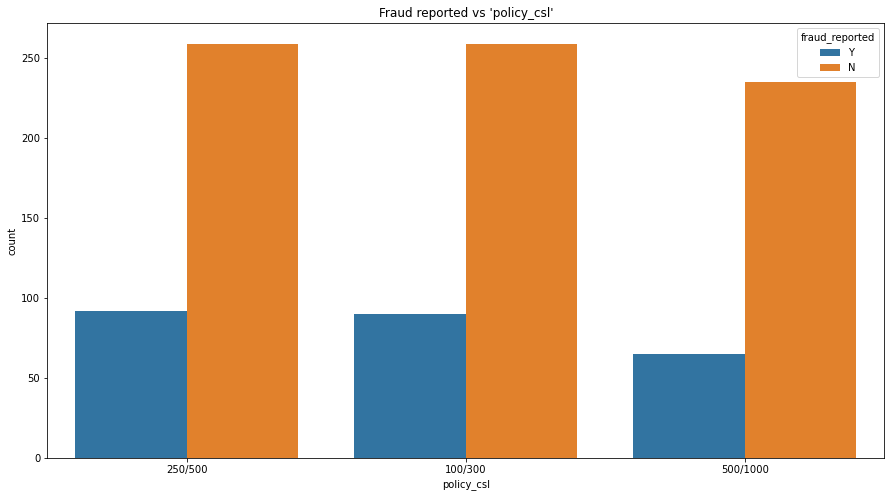

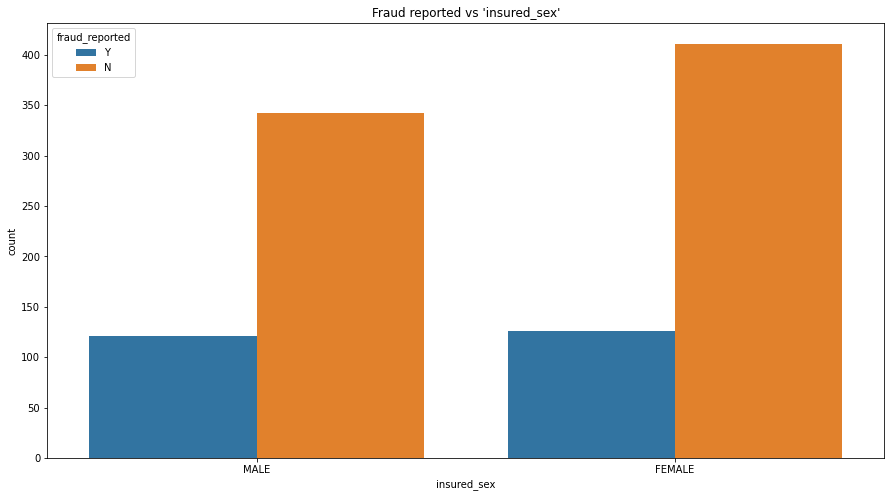

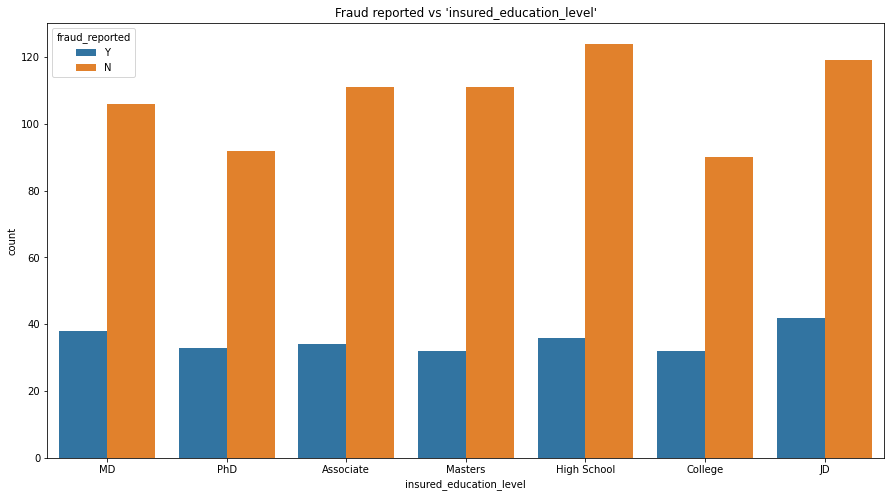

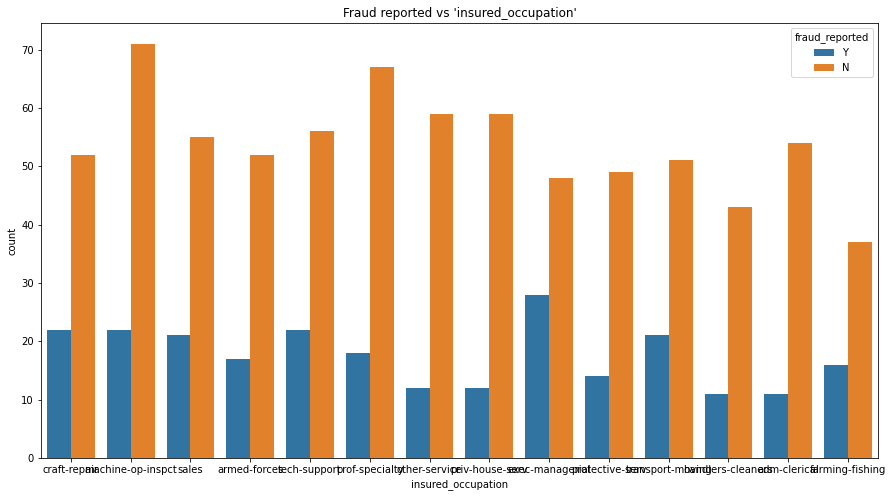

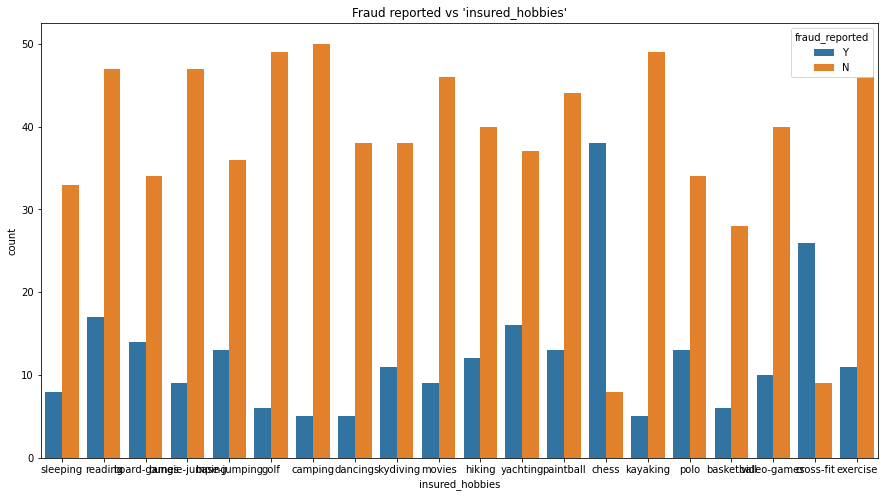

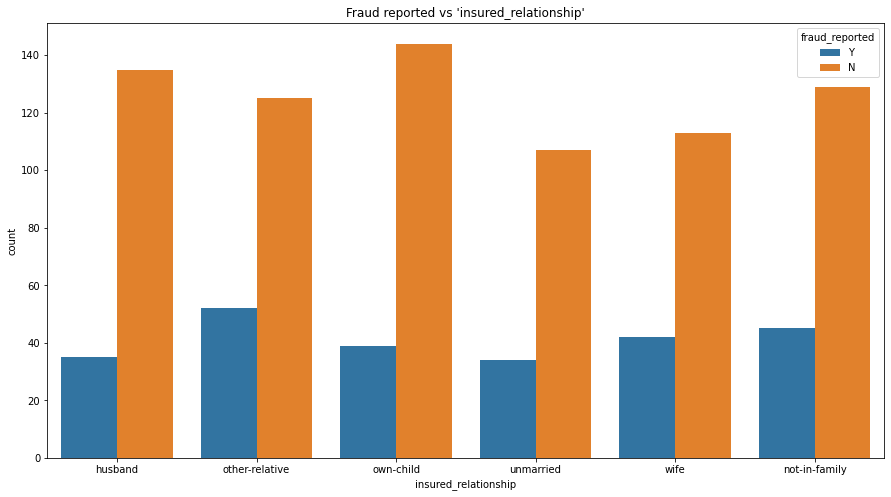

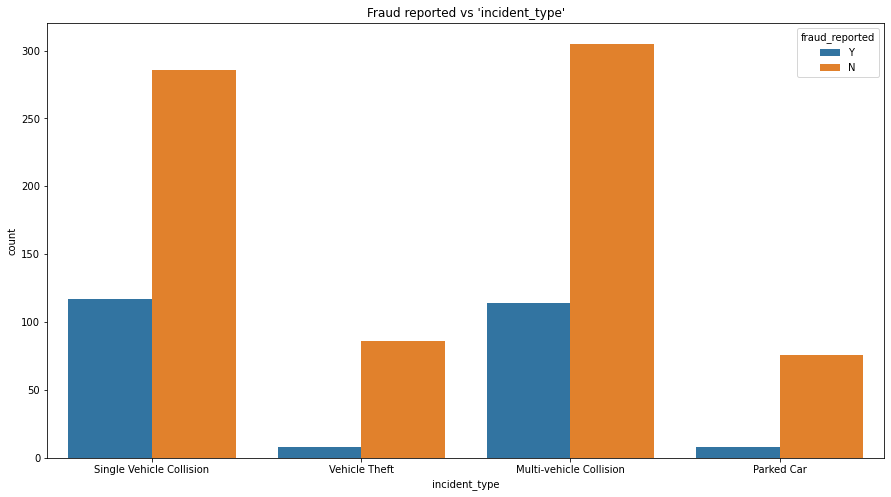

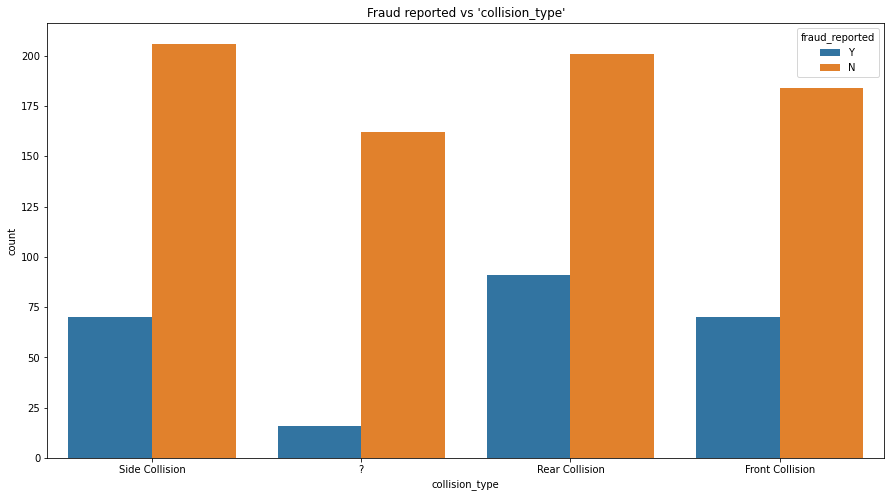

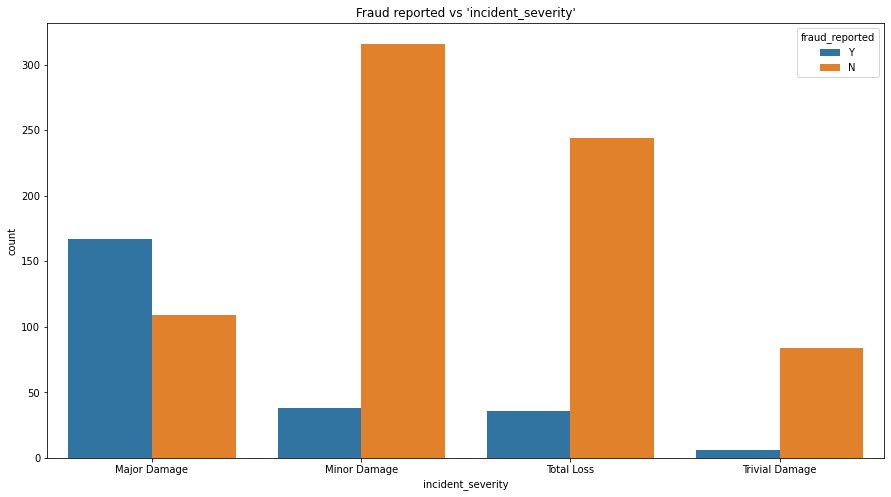

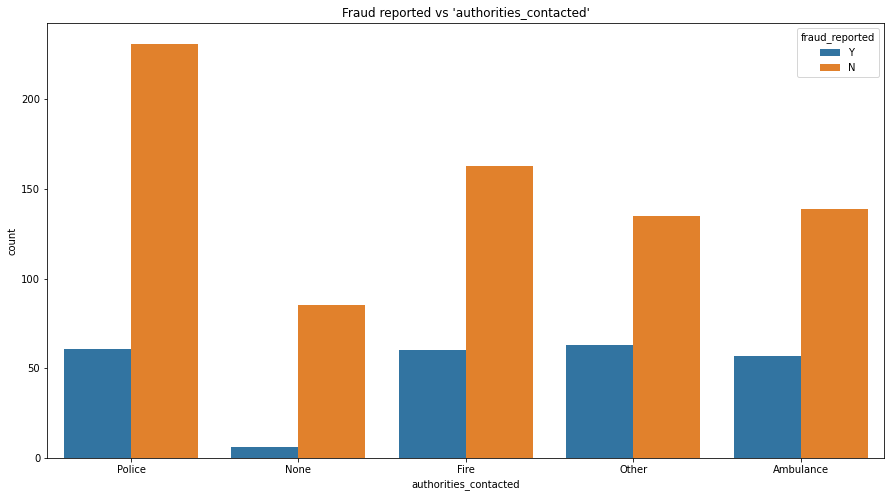

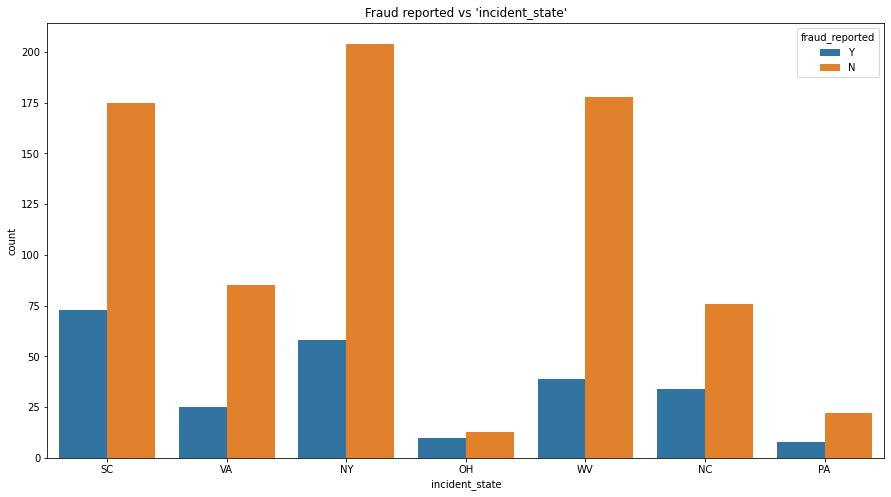

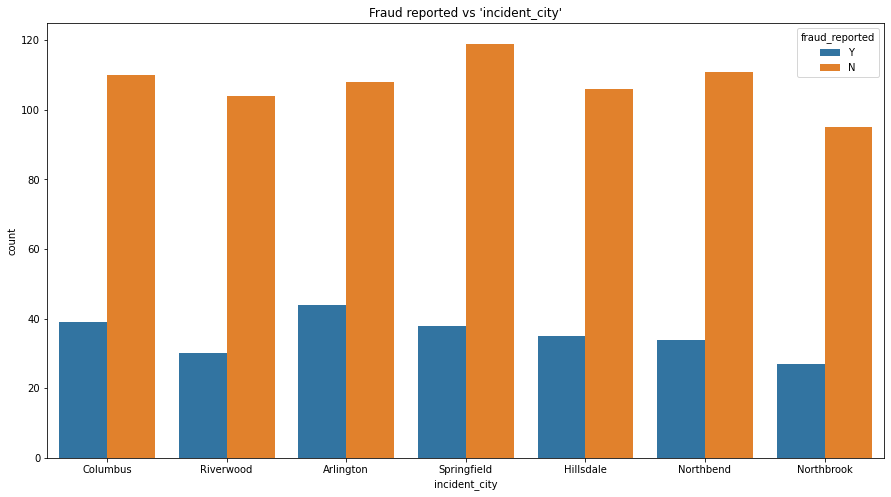

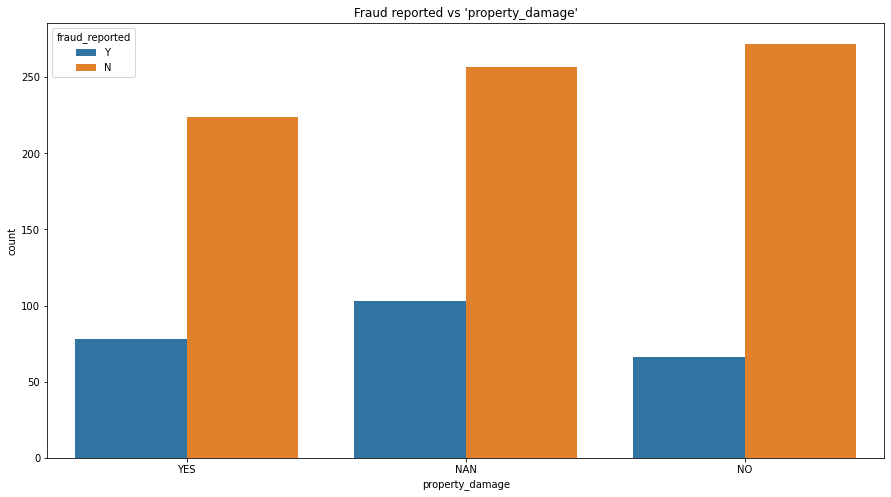

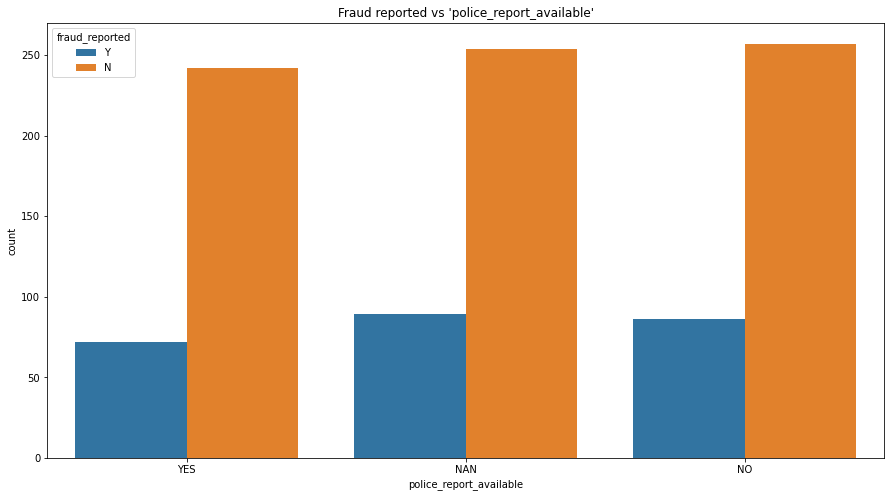

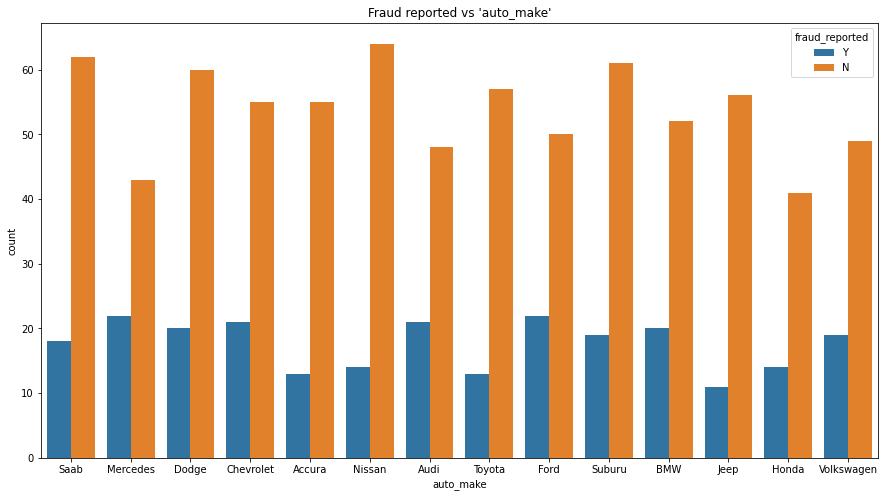

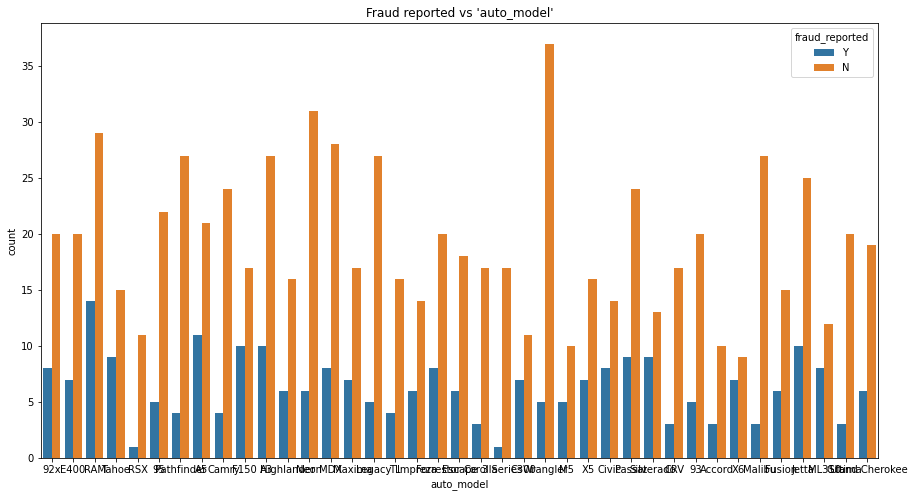

In [22]:
#bivariate analysis
for i in cate_cols[:-1]:                                
    plt.figure(figsize=(15, 8))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(ds[i],hue=ds['fraud_reported'])

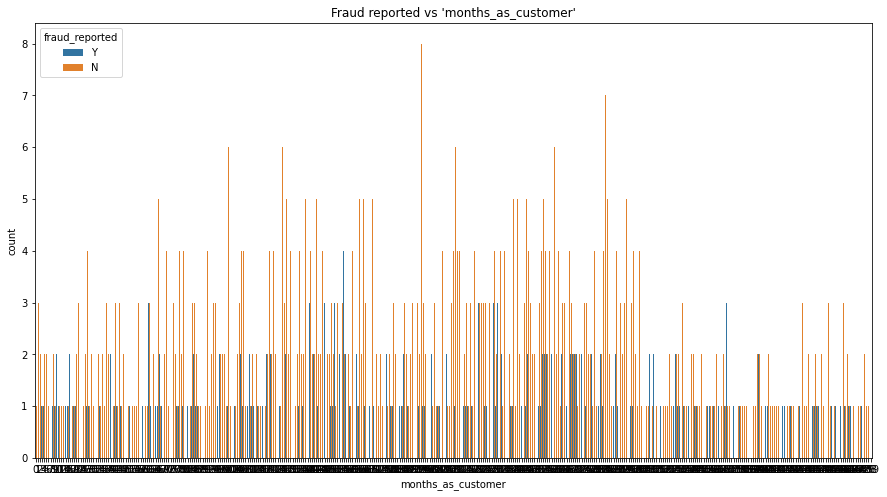

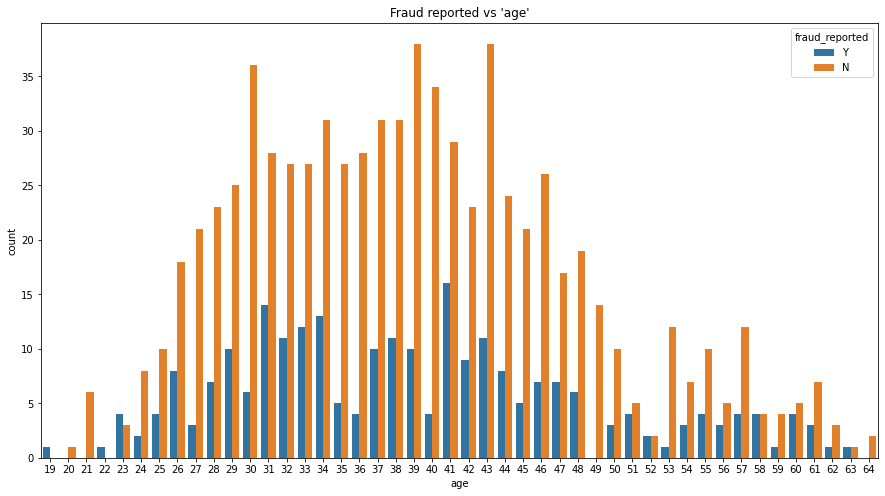

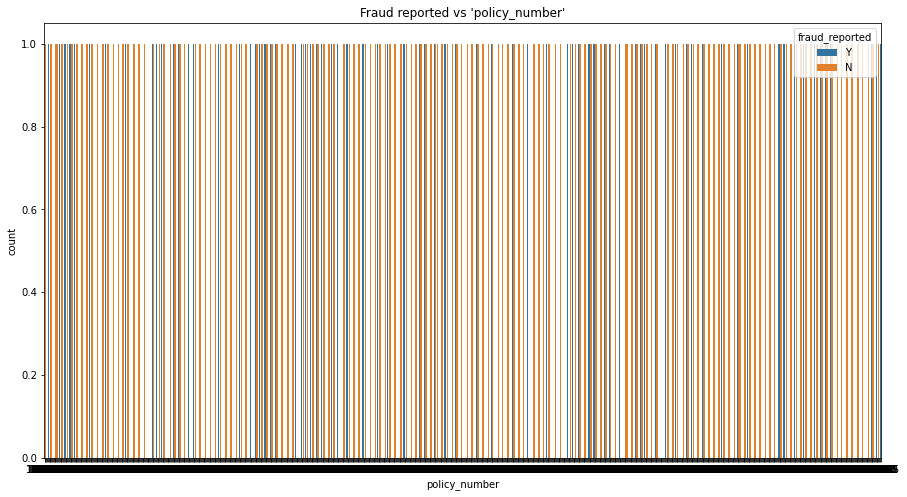

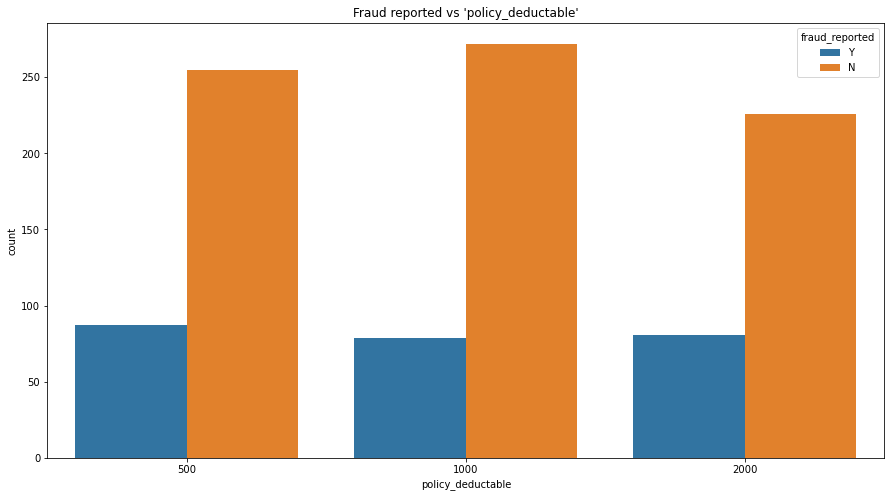

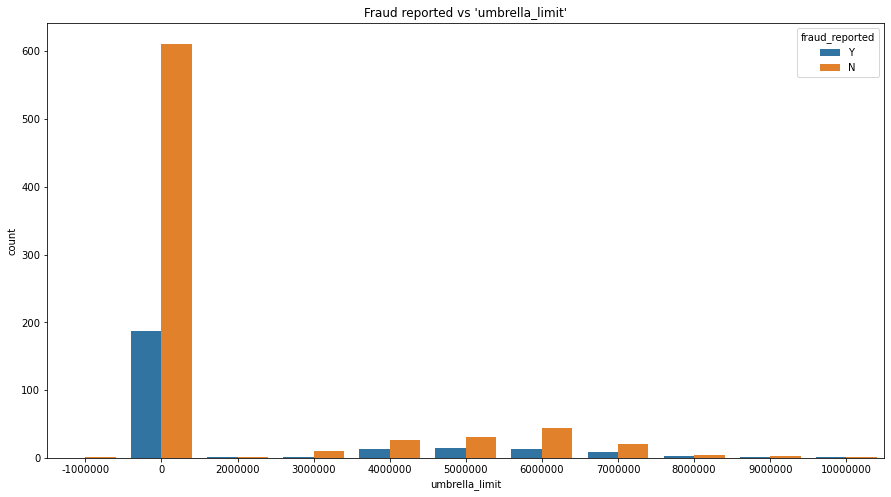

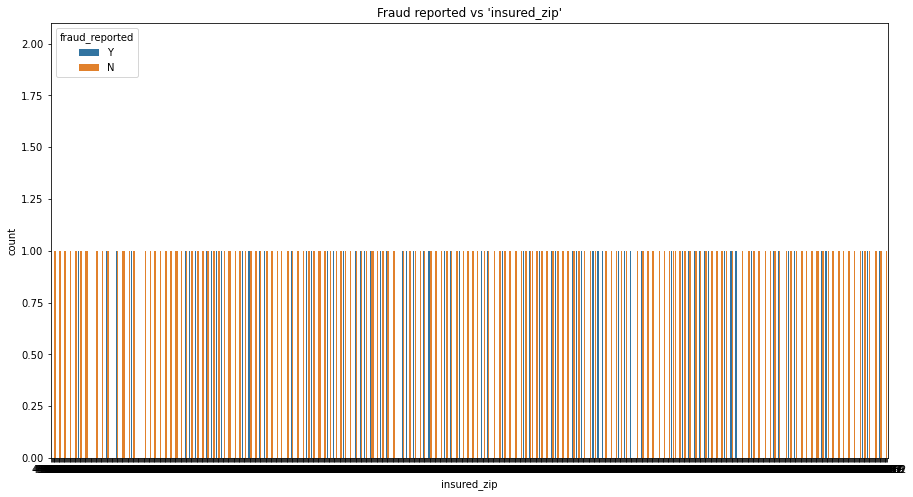

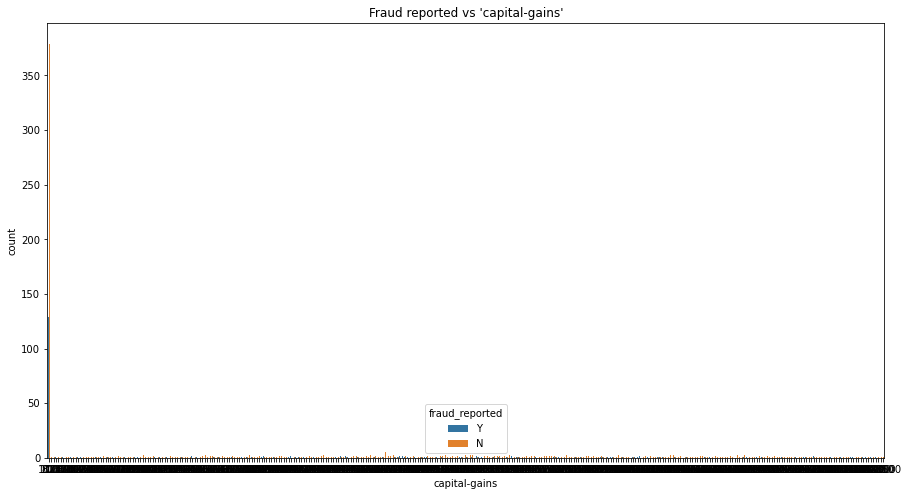

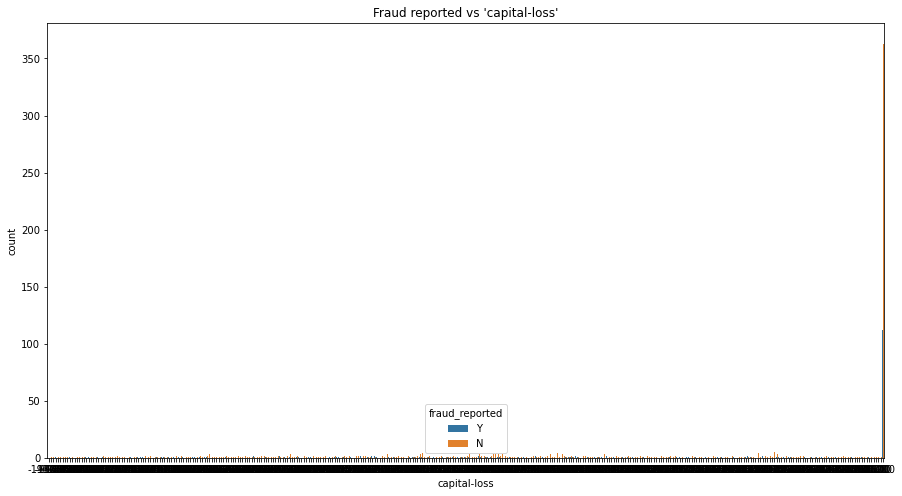

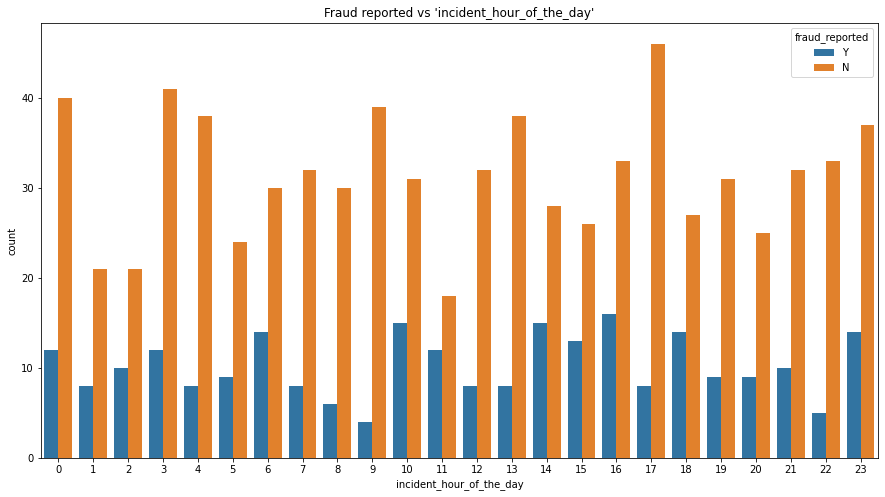

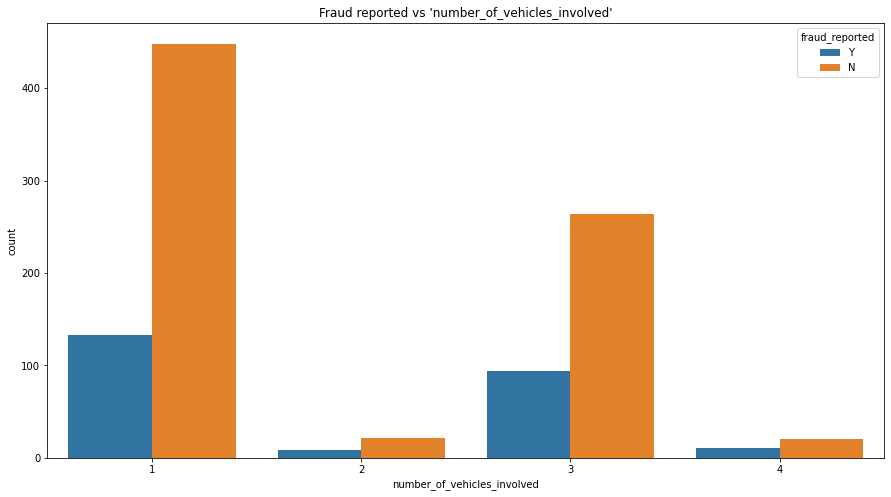

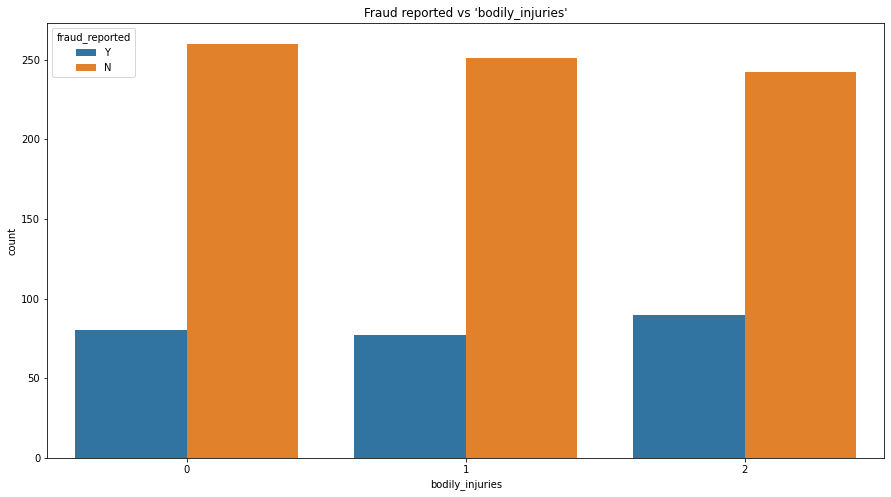

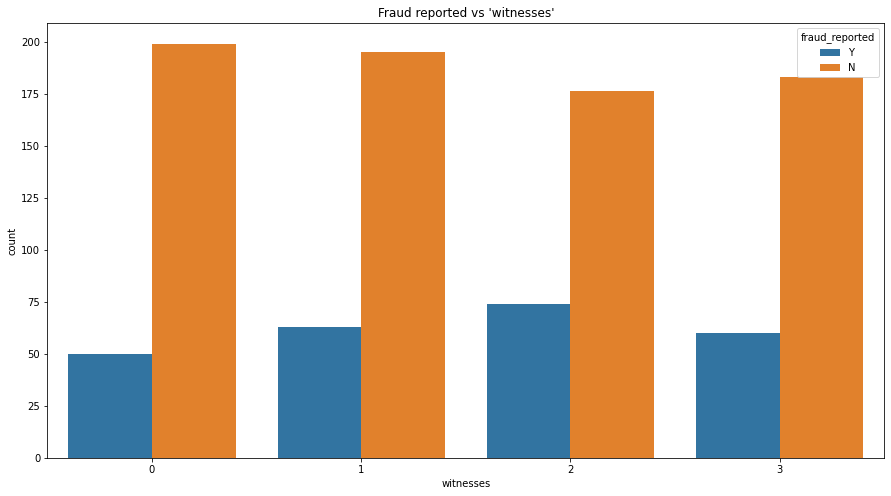

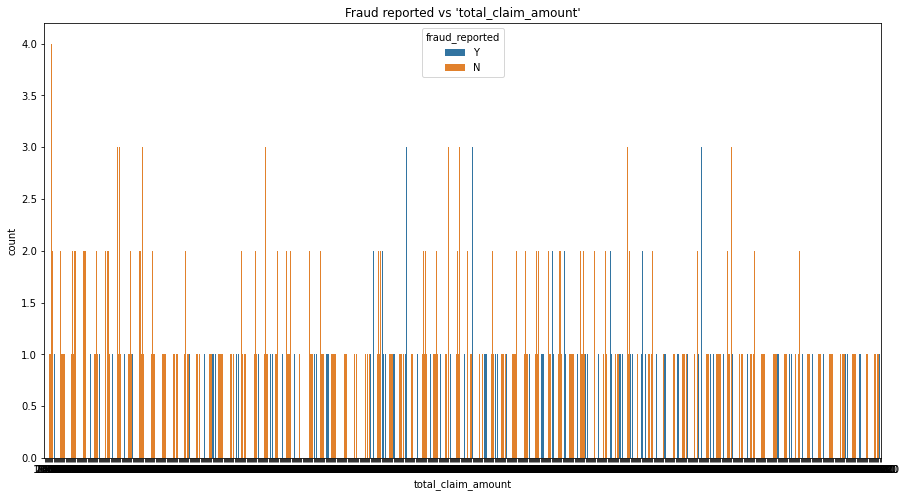

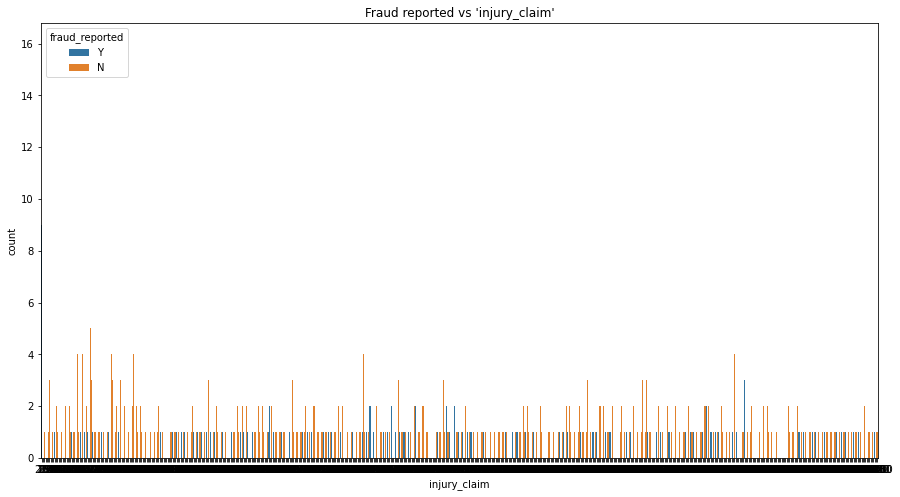

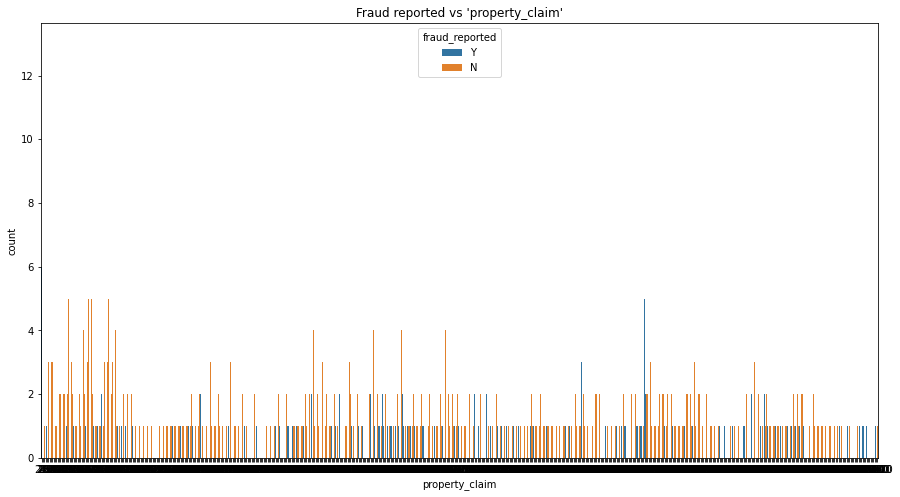

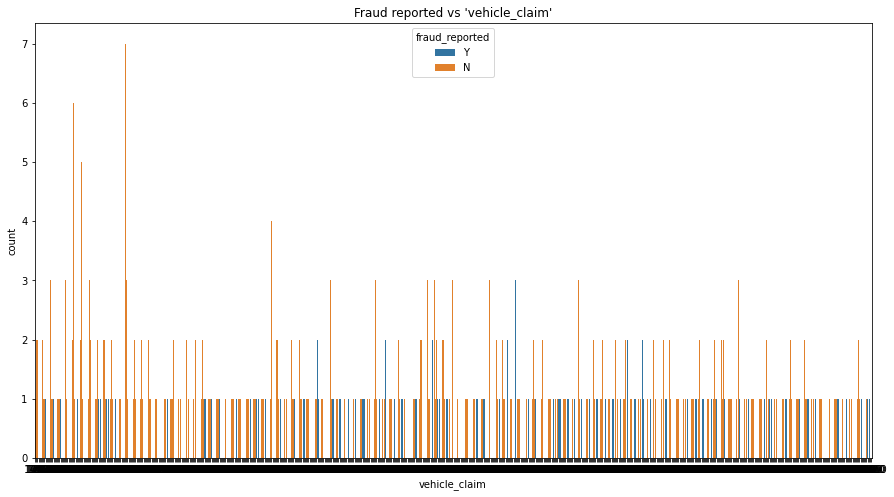

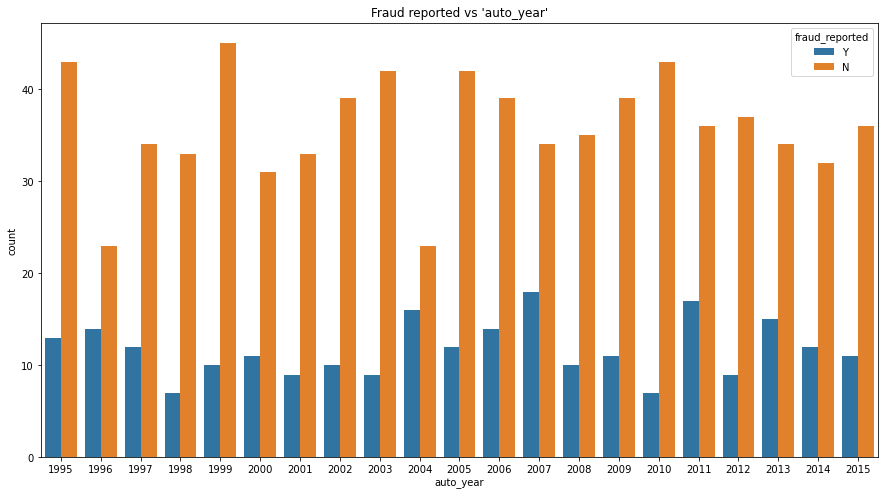

In [23]:
#bivariate analysis
for i in int_cols[:-1]:                                
    plt.figure(figsize=(15, 8))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(ds[i],hue=ds['fraud_reported'])

# Multivariate Anaylsis

In [24]:
#lets change the values into int of fraud_reported column
ds['fraud_reported'].replace('N', 0, inplace = True)
ds['fraud_reported'].replace('Y', 1, inplace = True)

Using Statistical Apporch to check the correlation of independent variables with dependent variable

In [25]:
ds[int_cols].describe()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1256.406150
std,115.113174,9.140287,257063.005276,611.864673,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,244.167395
min,0.000000,19.000000,100804.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,433.330000
25%,115.750000,32.000000,335980.250000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1089.607500
50%,199.500000,38.000000,533135.000000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1257.200000
75%,276.250000,44.000000,759099.750000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1415.695000
max,479.000000,64.000000,999435.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2047.590000


Count for all the columns is 1000, hence there are no missing values in these columns.

In [26]:
ds[cate_cols].describe()

,fraud_reported
count,1000.000000
mean,0.247000
std,0.431483
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [27]:
#checking the correlations between columns of full dataset
corr=ds.corr()
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


AxesSubplot(0.125,0.125;0.62x0.755)


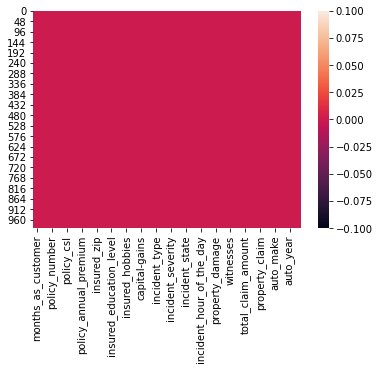

In [28]:
print(sns.heatmap(ds.isnull()))

<AxesSubplot:>

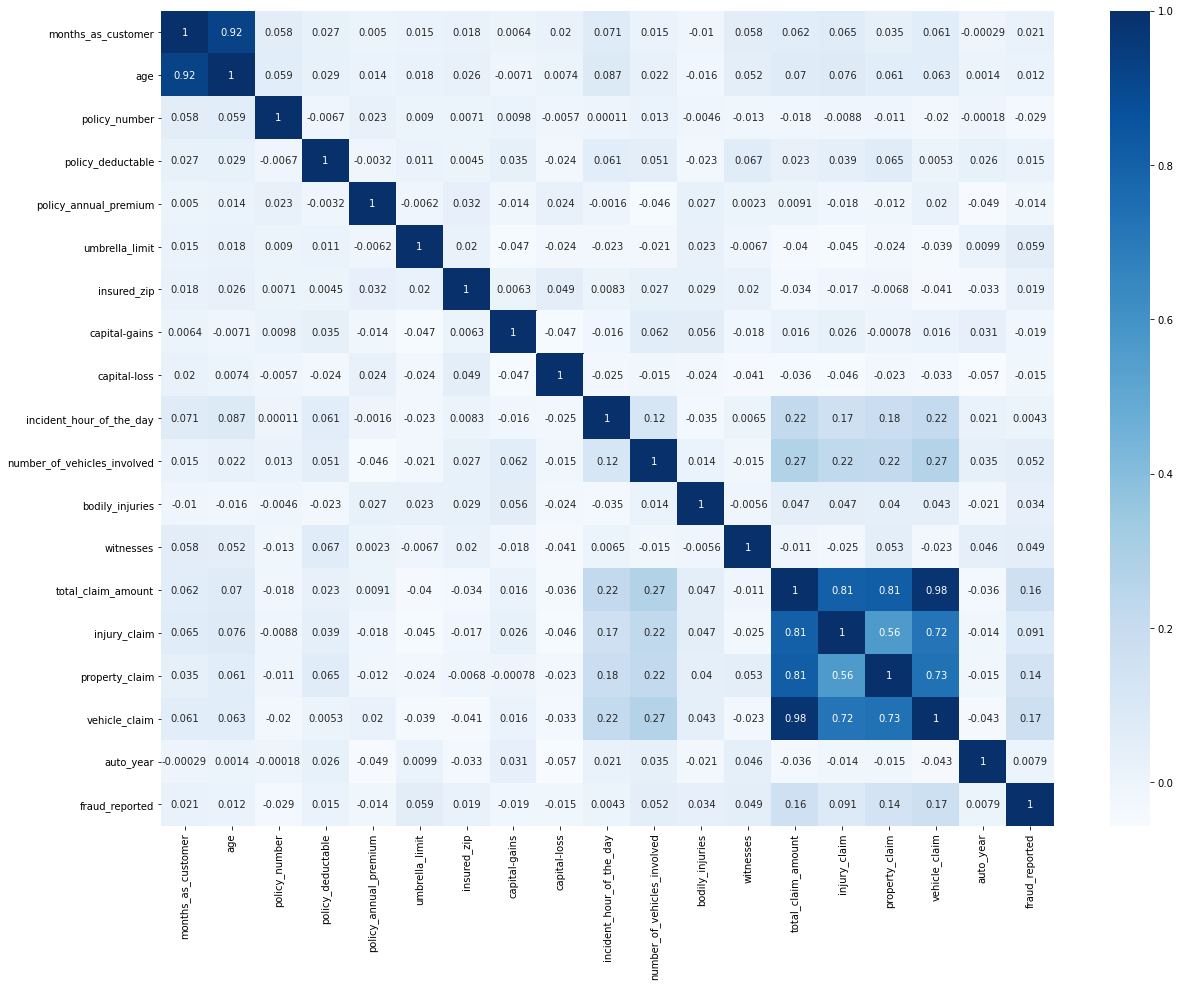

In [29]:
#example of multivariate 
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(20,15))
sns.heatmap(ds.corr(),annot=True,cmap="Blues")

As we can see that there are very good relation between some columns, between age & months_as_customer 0.92%, between other 0.98%, 0.72%, 0.81% columns

Using Label Encoder to convert str values into int

# Label Encoder

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for columns in cate_cols:
    ds[columns] = label_encoder.fit_transform(ds[columns])

In [31]:
ds[cate_cols].head(10)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,1,4,2,17,0,2,3,0,4,4,1,2,2,10,1,1
1,1,1,1,4,6,15,2,3,0,1,4,5,5,0,0,8,12,1
2,2,0,0,6,11,2,3,0,2,1,4,1,1,1,1,4,30,0
3,0,1,0,6,1,2,4,2,1,0,4,2,0,0,1,3,34,1
4,0,2,1,0,11,2,4,3,0,1,2,1,0,1,1,0,31,0
5,2,1,0,6,12,3,4,0,2,0,1,4,0,1,1,10,3,1
6,1,1,1,6,9,2,0,0,1,1,4,1,6,0,0,9,29,0
7,0,0,1,0,12,0,4,0,1,2,4,5,1,0,2,1,5,0
8,0,0,0,6,7,9,3,2,1,2,4,6,0,1,2,12,9,0
9,0,0,1,6,8,4,5,2,2,2,3,0,2,1,0,10,1,0


In [32]:
corr_matrix=ds.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173


As there not much skewness out of 0.5 to -0.5, so no need to treat it 

months_as_customer                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
age                            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
policy_number                  AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
policy_state                   AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
policy_csl                     AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
policy_deductable              AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
policy_annual_premium          AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
umbrella_limit                 AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
insured_zip                       AxesSubplot(0.125,0.593621;0.0824468x0.130172)
insured_sex                    AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
insured_education_level        AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
insured_occupation             AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
insured_hobbies             

<Figure size 3000x2000 with 0 Axes>

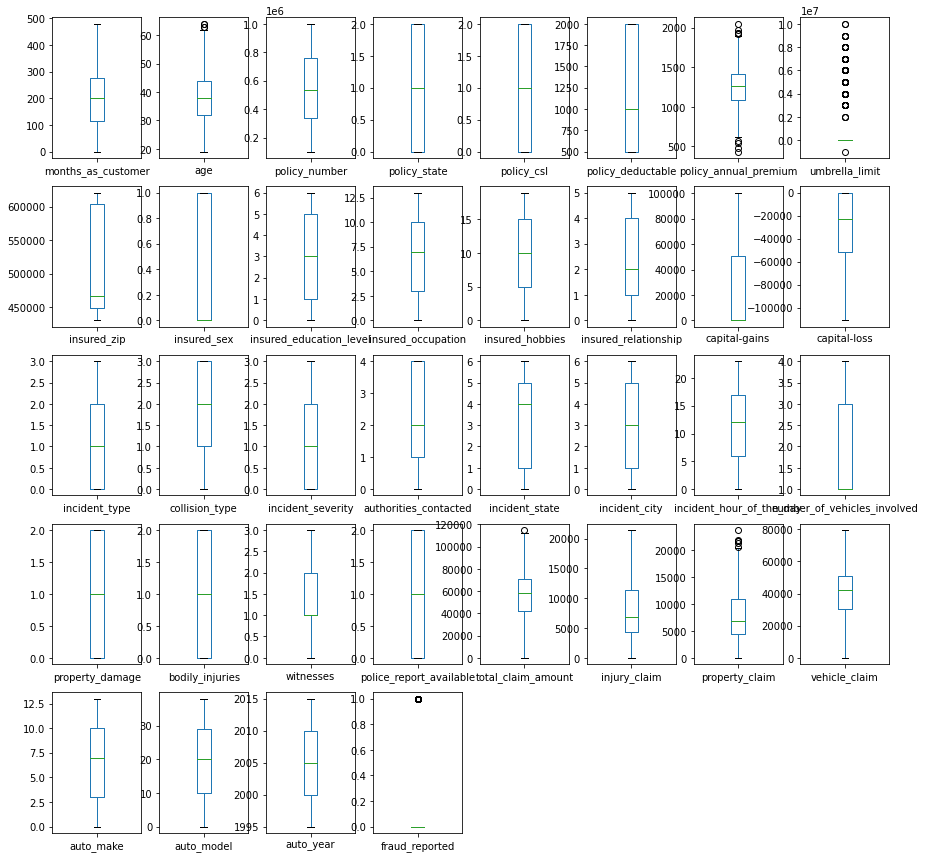

In [33]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,8),figsize=(15,15))

As we can that in above output only fews columns have outliers so no need to treat it. Lets go ahead

In [34]:
#finding unique number, max value, min value of each column in same time
for column in ds.columns:
    print(f"========Column: {column}========")
    print(f"Number of unique values: {ds[column].nunique()}")
    print(f"Max: {ds[column].max()}")
    print(f"Min: {ds[column].min()}")

========Column: months_as_customer========
Number of unique values: 391
Max: 479
Min: 0
========Column: age========
Number of unique values: 46
Max: 64
Min: 19
========Column: policy_number========
Number of unique values: 1000
Max: 999435
Min: 100804
========Column: policy_state========
Number of unique values: 3
Max: 2
Min: 0
========Column: policy_csl========
Number of unique values: 3
Max: 2
Min: 0
========Column: policy_deductable========
Number of unique values: 3
Max: 2000
Min: 500
========Column: policy_annual_premium========
Number of unique values: 991
Max: 2047.59
Min: 433.33
========Column: umbrella_limit========
Number of unique values: 11
Max: 10000000
Min: -1000000
========Column: insured_zip========
Number of unique values: 995
Max: 620962
Min: 430104
========Column: insured_sex========
Number of unique values: 2
Max: 1
Min: 0
========Column: insured_education_level========
Number of unique values: 7
Max: 6
Min: 0
========Column: insured_occupation========
Number of uni

# Prepare the data for Predicution and model training

# M/C learning Model (Train,Test,Split)

In [35]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix



lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()


# Best random Score

In [46]:
#doing train and test to traing model
#x is the data value and y is the target value
x = ds.drop('fraud_reported', axis = 1)
y = ds['fraud_reported']

In [47]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 190


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=190)
print('X train.Shape:',x_train.shape)
print('X test.shape:',x_test.shape)
print('Y train.shape:',y_train.shape)
print('Y test.shape:',y_test.shape)

X train.Shape: (700, 35)
X test.shape: (300, 35)
Y train.shape: (700,)
Y test.shape: (300,)


We are passing .30% data for test model. Lets chec the accuracy score, confusion metrix and classification score by different different alghorthm

Using alghorythms

Accuracy score of LogisticRegression() is: 0.81


Confusion matrix of LogisticRegression() is:
[[239   2]
 [ 55   4]]


Classification report of LogisticRegression() is:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       241
           1       0.67      0.07      0.12        59

    accuracy                           0.81       300
   macro avg       0.74      0.53      0.51       300
weighted avg       0.78      0.81      0.74       300



Cross_val_Score of LogisticRegression() is:


[0.75  0.755 0.735 0.755 0.755]


Score_Mean: 0.7499999999999999


************************************************************************
Accuracy score of GaussianNB() is: 0.5733333333333334


Confusion matrix of GaussianNB() is:
[[145  96]
 [ 32  27]]


Classification report of GaussianNB() is:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       241
           1       0.22      0.46      0.30   

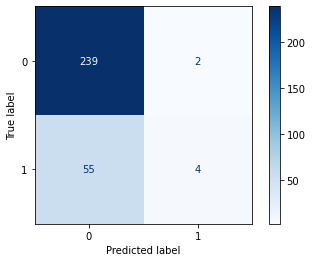

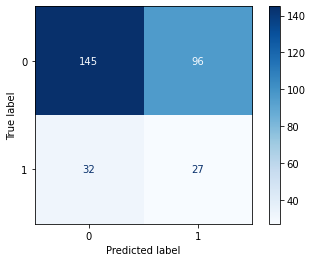

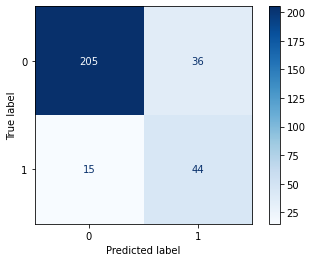

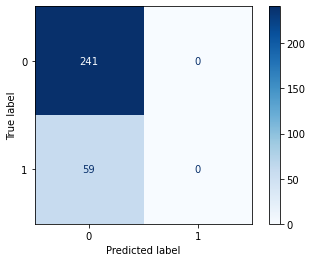

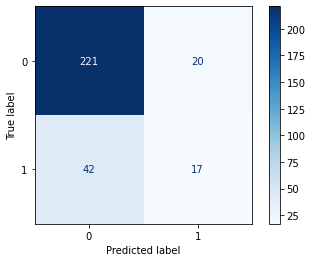

In [40]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print('Confusion matrix of',m,'is:')
    plot_confusion_matrix(m ,x_test , y_test , cmap = 'Blues' )
    print(confusion_matrix(y_test,predm))
    print('\n')
    print('Classification report of',m, 'is:')
    print(classification_report(y_test,predm))
    print('\n')
    print('Cross_val_Score of',m,'is:')
    score=cross_val_score(lg, x, y, cv=5)
    print('\n')
    print(score)
    print('\n')
    print("Score_Mean:", score.mean())
    print('\n')
    print('************************************************************************')

We got best accuracy score from DecisionTreeClassifier is 0.83%

# Hyper parameter tuning 

In [41]:
#using the GridSearch for hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

# in Decision tree gini get the best result (which is default)

{'criterion': 'entropy'}
0.799


In [42]:
# changing random_state and n_estimators to get more accuracy
rf = RandomForestClassifier(n_estimators=500,random_state=37)
#RandomForenstClassifier(100)---Default
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7766666666666666
[[215  26]
 [ 41  18]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       241
           1       0.41      0.31      0.35        59

    accuracy                           0.78       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.76      0.78      0.76       300



we got the best hypertunning parameter with DecisionTree model

Now we found that we got best Accuracy Score 0.83%, HyperParameter Tunning score 0.79% and Cross Validation Score 0.75% with Decisitontree Classifier so we can save our model with DTC.

# ROC_AUC Curve

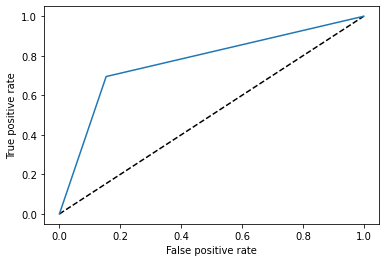

AUC_ROC_SCORE: 0.7706941416414657


Predicted value: [1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 0]
actual value: 39     1
882    0
976    0
772    0
465    0
      ..
128    1
216    0
733    0
503    0
542    0
Name: fraud_reported, Length: 300, dtype: int64


In [50]:
# as per request AUC and ROC for dtc

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=dtc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

# file saving

In [51]:
import joblib
import pickle
joblib.dump(dtc,"Insurance_Claims.obj")
dtc_from_joblib=joblib.load("Insurance_Claims.obj")